In [ ]:
# SNOWIE Case Study IOP23 3/9/2017 20:00 - 23:45Z

In [ ]:
#Import Packages

In [1]:
import netCDF4 as nc
import numpy as np
import random
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
import matplotlib.patheffects as PathEffects
from matplotlib.image import imread
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import matplotlib.contour
import pandas as pd
import datetime as dt
from datetime import datetime
import time 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.contour
import xarray as xr
import statistics
import csv
import metpy
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.plots import ImagePlot, MapPanel, PanelContainer
from metpy.calc import wind_components
from metpy.interpolate import cross_section
from scipy.constants import convert_temperature

C:\Users\mstell2\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#**********************************************************************************************

In [3]:
# Load probe and aircraft netCDF Data Files

In [2]:
IOP23=nc.Dataset('nevzorov_corr_IOP23.nc','r')  #SNOWIE Nevzorov probe LWC/TWC/IWC Variables IOP22

In [3]:
IOP23_Orig=nc.Dataset('20170309b.c1.nc','r')  #SNOWIE Orig_Files Aircraft Data IOP12

In [6]:
# Load ARDT netCDF data files

In [7]:
Rutz=nc.Dataset('MERRA2.ar_tag.Rutz.3hourly.20170101-20170430.nc4','r') #ARTMIP Rutz ARDT 

In [8]:
G_W = nc.Dataset('MERRA2.ar_tag.Guan_Waliser_v2.3hourly.2017.nc4', 'r')  #ARTMIP Guan_Waliser ARDT

In [9]:
#Load IVT netCDF data files

In [10]:
IVTData =nc.Dataset('IVT2017.nc', 'r')   #ARTMIP 2017 IVT Values

In [11]:
#Load Cloud Height data

In [12]:
WCRCloudHeight=nc.Dataset('wcr_cloudheights_IOP12.nc','r') 

In [13]:
#Load Sounding Data & Define Variables -Crouch Location

In [11]:
#Sounding 19Z

In [4]:
df_19Z = pd.read_csv('Crouch_1901_Sounding.csv')
P_19Z = np.asarray((df_19Z['Sound_hPa'])*units.hPa)
T_19Z = np.asarray((df_19Z['Sound_Temp']))
WindS_19Z = np.asarray((df_19Z['Sound_WindS'])*units.meter/units.second)
WindD_19Z = np.asarray((df_19Z['Sound_WindD'])*units.degrees)
temperatureC_19Z = T_19Z*units.degC
RH_19Z = np.asarray((df_19Z['Sound_RH'])*units.percent)
K_19Z = convert_temperature(T_19Z,'C','K')
temperature19Z = T_19Z*units.degC
temperatureK_19Z = K_19Z*units.kelvin
rh19Z = RH_19Z*units.percent
Td_19Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_19Z, rh19Z)

pressureMb_19Z = P_19Z*units.mbar
pressure_hPa_19Z= P_19Z*units.hPa
Theta_19Z = mpcalc.potential_temperature(pressureMb_19Z, temperatureK_19Z)
Theta_E_19Z = mpcalc.equivalent_potential_temperature(pressureMb_19Z, temperatureK_19Z, Td_19Z)
wind_speed19Z = WindS_19Z*units.meter/units.second
wind_direction19Z = WindD_19Z*units.degrees
u_19Z,v_19Z = mpcalc.wind_components(wind_speed19Z, wind_direction19Z)
lcl_pressure19Z, lcl_temperature19Z = mpcalc.lcl(pressure_hPa_19Z[0], temperatureC_19Z[0], Td_19Z[0])
height19Z = mpcalc.pressure_to_height_std(pressure_hPa_19Z)
height19Z = height19Z.to(units.meter)
#print(Td_19Z)

In [8]:
#Lowman 22:01Z Sounding

In [15]:
df_22Z = pd.read_csv('Lowman_IOP23_2201_Sounding.csv')
P_22Z = np.asarray(df_22Z['Sound_hPa'])
T_22Z = np.asarray(df_22Z['Sound_Temp'])
WindS_22Z = np.asarray(df_22Z['Sound_WindS'])
WindD_22Z = np.asarray(df_22Z['Sound_WindD'])
RH_22Z = np.asarray(df_22Z['Sound_RH'])
temperatureC_22Z = T_22Z*units.degC
rh22Z = RH_22Z*units.percent
K_22Z = convert_temperature(T_22Z,'C','K')
temperatureK_22Z = K_22Z*units.kelvin
Td_22Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_22Z, rh22Z)
pressureMb_22Z = P_22Z*units.mbar
pressure_hPa_22Z= P_22Z*units.hPa
Theta_22Z = mpcalc.potential_temperature(pressureMb_22Z, temperatureK_22Z)
Theta_E_22Z = mpcalc.equivalent_potential_temperature(pressureMb_22Z, temperatureK_22Z, Td_22Z)
wind_speed22Z = WindS_22Z*units.meter/units.second
wind_direction22Z = WindD_22Z*units.degrees
u_22Z,v_22Z = mpcalc.wind_components(wind_speed22Z, wind_direction22Z)
lcl_pressure22Z, lcl_temperature22Z = mpcalc.lcl(pressure_hPa_22Z[0], temperatureC_22Z[0], Td_22Z[0])
height22Z = mpcalc.pressure_to_height_std(pressure_hPa_22Z)
height22Z = height22Z.to(units.meter)


In [6]:
#Crouch 23:01 Sounding 

In [14]:
df_23Z = pd.read_csv('Crouch_IOP23_2301_Sounding.csv')
P_23Z = np.asarray(df_23Z['Sound_hPa'])
T_23Z = np.asarray(df_23Z['Sound_Temp'])
WindS_23Z = np.asarray(df_23Z['Sound_WindS'])
WindD_23Z = np.asarray(df_23Z['Sound_WindD'])
RH_23Z = np.asarray(df_23Z['Sound_RH'])
temperatureC_23Z = T_23Z*units.degC
rh23Z = RH_23Z*units.percent
K_23Z = convert_temperature(T_23Z,'C','K')
temperatureK_23Z = K_23Z*units.kelvin
Td_23Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_23Z, rh23Z)
pressure_hPa_23Z= P_23Z*units.hPa
pressureMb_23Z = P_23Z*units.mbar
Theta_23Z = mpcalc.potential_temperature(pressureMb_23Z, temperatureK_23Z)
Theta_E_23Z = mpcalc.equivalent_potential_temperature(pressureMb_23Z, temperatureK_23Z, Td_23Z)
wind_speed23Z = WindS_23Z*units.meter/units.second
wind_direction23Z = WindD_23Z*units.degrees
u_23Z, v_23Z = mpcalc.wind_components(wind_speed23Z, wind_direction23Z)
#lcl_pressure22Z, lcl_temperature22Z = mpcalc.lcl(pressure_hPa_22Z[-1], temperatureC_22Z[0], Td_22Z[0])
height23Z = mpcalc.pressure_to_height_std(pressure_hPa_23Z)
height23Z = height23Z.to(units.meter)


In [19]:
#Extract a slice of IVT data
#IVTTime = ds.pre[#start:endtime]

In [20]:
#**********************************************************************************************

In [21]:
# Define Variables

In [26]:
# SNOWIE IOP Time/LWC/IWC/TWC Variables

In [7]:
IOP23time = IOP23.variables['time_s'][:] #Dimension 14371, Units: hours since 1/1/1970
lwc = IOP23.variables['lwc_corr'][:] #units g/m^3
iwc = IOP23.variables['iwc_corr'][:] #units g/m^3|
twc = IOP23.variables['twc_corr'][:] #units g/m^3

In [5]:
#SNOWIE UWKA aircraft variables

In [8]:
UWKA_Time =IOP23_Orig.variables['time'][:] #time dimensions 14371  #seconds since 1/1/2017 00:00:00  IOP12 time interval 19:30:25 - 23:29:55 2/7/2017 (1486495825 - 1486510195)
td =IOP23_Orig.variables['tdp'][:]  #dew point temp degrees Celsius
mr =IOP23_Orig.variables['mr'][:]  #mixing ratio g/kg
rh =IOP23_Orig.variables['rh'][:]  #relative humidity %
PALT =IOP23_Orig.variables['PALT'][:]  #Pressure altitude meters
alt =IOP23_Orig.variables['ztrue'][:] #hypsometric altitude meters
tas =IOP23_Orig.variables['tas'][:]  #true airspeed m/s
GLAT =IOP23_Orig.variables['GLAT'][:]  # latitude degrees north 
GLON =IOP23_Orig.variables['GLON'][:]  #Longitude degrees east
GALT =IOP23_Orig.variables['GALT'][:]  #Altitude meters
topo =IOP23_Orig.variables['topo'][:]  #topography meters WGS84 aster
pTemp =IOP23_Orig.variables['thetad'][:] # potential temperature dry K
eTemp =IOP23_Orig.variables['thetae'][:]  #Equivalent potential temperature K 
twodp =IOP23_Orig.variables['twodp'][:] # 2DP shadow or concentration liter-1 sample rate 10 
uwind =IOP23_Orig.variables['avuwind'][:] #horizontal wind e/w component (x axis) m/s
vwind =IOP23_Orig.variables['avvwind'][:]  # horizontal wind n/s component (yaxis) m/s
zwind =IOP23_Orig.variables['avwwind'][:]  #vertical wind up component (z axis) m/s upward air verlocity 
winddir =IOP23_Orig.variables['avwdir'][:]  #real time wind direction (from) degree T 
windmag =IOP23_Orig.variables['avwmag'][:]  #real time wind magnitude m/s
CDP_Con =IOP23_Orig.variables['cdpconc_NRB'][:] #DMT CDP Total Concentration (/cc)
CDP_LWC =IOP23_Orig.variables['cdplwc_NRB'][:]  #DMT CDP Liquid Water Content (g/m^3)
CDP_Diam =IOP23_Orig.variables['cdpdbar_NRB'][:] #DMT CDP Mean Diameter (um)
UWKA_Temp =IOP23_Orig.variables['trose'][:] #Temperature degrees celsius

In [30]:
# ARTMIP Rutz ARDT Variables

In [31]:
RutzTime =Rutz.variables['time'][:] #Time spans 1/1/17 - 4/30/17 Seconds since 1/1/1980
RutzLat =Rutz.variables['lat'][:] 
RutzLon =Rutz.variables['lon'][:]
Rutz_AR = Rutz.variables['ar_binary_tag'][:] #Atmospheric River detection variable
RutzAR =np.sum(Rutz.variables['ar_binary_tag'],(1,2))
#Use RutzAR to create time series, total over the lat and lon to give the number of grids that have an AR
#Use AR for all other plots using AR data (contour plots)

In [32]:
# ARTMIP Guan Waliser ARDT Variables

In [33]:
GWTime =G_W.variables['time'][:] #hours since 1/1/1980 
GWLat =G_W.variables['lat'][:] 
GWLon =G_W.variables['lon'][:]
GW_AR = G_W.variables['ar_binary_tag'][:] #Atmospheric River detection variable
GWAR =np.sum(G_W.variables['ar_binary_tag'],(1,2))
#Use RutzAR to create time series, total over the lat and lon to give the number of grids that have an AR
#Use AR for all other plots using AR data (contour plots)

In [34]:
# ARTMIP IVT Variables

In [35]:
IVTLat = IVTData.variables['lat'][:]          #latitude, Y axis, Degrees North 
IVTLon = IVTData.variables['lon'][:]        #longigude, Z axis, Degrees East
IVT = IVTData.variables['IVT'][:]          #Integrated water vapor transport, kg/m/s
IVTu = IVTData.variables['uIVT'][:]         #U component of IVT, eastward wind, k/m/s
IVTv = IVTData.variables['vIVT'][:]         #V component of IVT, eastward wind, kg/m/s
IWV = IVTData.variables['IWV'][:]          #Integrated water vapor, eastward wind, mm 
SP_IVT = IVTData.variables['PS'][:]        #Surface pressure, hPa

In [36]:
#Correct time for ARTMIP ARs 

In [38]:
ARTime = np.array(RutzTime)*3600 - 1167696000   #convert RutzTime into seconds since 1/1/2017 from original hours since 1980
#1/1/17 = 0 seconds
# 1/1/70 - 1/1/17 = 1483228800 seconds 
#Seconds between 1970 and 1980 = 315532800
#(((365 * 10 years) + 2 leap days)*86400 seconds per year) = 315532800 seconds
#1/1/80 - 1/1/17 = 1483228800 - 3155532800 = 

#ARTime.shape
#print(ARTime)

In [39]:
ARTime = np.array(RutzTime)*3600 - 1167696000   #convert RutzTime into seconds since 1/1/2017 from original seconds since 1980
#1/1/17 = 0 seconds
#ARTime.shape
#print(ARTime)

In [40]:
RutzTimeIOP12 = ARTime[np.where((ARTime > 3267025.) & (ARTime < 3281395.))]   #find time in Rutz data that corresponds to IOP12 Flight 
#IOP12 flight time: 3267025 - 3281395 seconds
#print(RutzTimeIOP12)
#19:30:25 = 3267025 seconds 
#Rutz AR occured at 3272400 seconds in Rutz dataset = 21:00:00
#(ARDTs are in 3 hour intervals, IOP12 is a 3 hour flight) 2 ARDTs cover IOP 12  

In [41]:
GW_Time = np.array(GWTime)*3600 - 1167696000   #convert GWTime into seconds since 1/1/2017 from original seconds since 1980
#1/1/17 = 0 seconds
#ARTime.shape
#print(GW_Time)

In [42]:
GWTimeIOP12 = GW_Time[np.where((GW_Time > 3267025.) & (GW_Time < 3281395.))]   #find time in GW data that corresponds to IOP12 Flight 
#IOP12 flight time: 3267025 - 3281395 seconds
#print(GWTimeIOP12)
#Rutz AR occured at 3272400 seconds in Rutz dataset (ARDTs are in 3 hour intervals, IOP12 is a 3 hour flight, only 1 Rutz AR timeslice corresponded to IOP12) 

In [43]:
# Fix SNOWIE Instrument Time: SNOWIE Nevzorov Data is in seconds since Jan 1, 1970, aircraft is seconds since 1/1/17 

In [44]:
#days_since_1970 = 365*47+12
#time = time/24 - seconds_since_1970
#1/1/2017 00:00:00 = 1483228800 (seconds since 1/1/1970 to 1/1/17)
#1486425600 seconds since 1/1/1970 to 2/7/2017 00:00:00
#IOP12 time interval 19:30:25 - 23:29:55 2/7/2017 (1486495825 - 1486510195 seconds since 1970)

In [9]:
UWKA_Time_IOP23 = UWKA_Time + 1483228800 #seconds from 1/1/1970 - 1/1/2017
#print(UWKA_Time_IOP12)

In [10]:
UWKA_Time_Corr = mdates.epoch2num(UWKA_Time_IOP23)
#print(UWKA_Time_Corr)

C:\Users\mstell2\AppData\Local\Temp\ipykernel_17364\1419224986.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use `date2num(datetime.utcfromtimestamp(e))<.date2num>` instead.
  UWKA_Time_Corr = mdates.epoch2num(UWKA_Time_IOP23)


In [49]:
#Put instrument data in seconds since 1/1/2017 to match aircraft time

In [11]:
Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds
#print(Micro_Time)

C:\Users\mstell2\AppData\Local\Temp\ipykernel_17364\1773702937.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use `date2num(datetime.utcfromtimestamp(e))<.date2num>` instead.
  Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds


In [52]:
# Checking ARDT times to make sure they line up with IOP flight time 

In [53]:
#ARDT data in 3 hour segments.  3 hours = 10800 seconds 
#AR_Rutz_3hrPrior = 3256225 + 1483228800 
# 3267025 - 10800(3 hours) = 3256225
#print(AR_Rutz_3hrPrior)
# = 1486485025 = 16:30:25

#AR_Rutz_6hrPrior = 3245425 + 1483228800 
# 3256225 - 10800(3 hours) = 3245425
#print(AR_Rutz_6hrPrior)
# = 1486474225 = 13:30:25

#AR_Rutz_IOP_End = 3281395 + 1483228800 
#print(Rutz_End)
# = 1486510195 = 2/7/2017 23:29:55

#AR_Rutz_Beginning = 3267025 + 1483228800 
# 3256225 + 10800(3 hours) = 3267025
#print(AR_Rutz_Beginning)
# = 1486495825 = 19:30:25

#AR_Rutz_Middle = 3277825 + 1483228800 
# 3267025 + 10800(3 hours) = 3277825
#print(AR_Rutz_Middle)
# = 1486506625 = 22:30:25

#AR_Rutz_End = 3288625 + 1483228800 
# 3277825 + 10800(3 hours) = 3288625
#print(AR_Rutz_End)
# = 1486506625 = 2/8/17 01:30:25

#RutzTime_Start = ARTime[np.where((ARTime > 3257025.) & (ARTime < 3277825))]   #find time in Rutz data that corresponds to 3 hours before start of IOP12
#IOP12 flight time: 3267025 - 3281395 seconds = 19:30:25 - 23:29:55
#Rutz Start: 19:30:25 - 22:30:25
#Next Rutz measurement: 22:30:25 = 3277825
#3 hours before = start time - 10800 seconds (3 hours)
#print(RutzTime_Start)

#AR_Rutz_Occurance = 3272400 + 1483228800 
#print(AR_Rutz_Occurance)
# = 1486501200 = 2/7/2017 21:00

#RutzTime_End = ARTime[np.where((ARTime > 3277825) & (ARTime < 3281395.))]   #find time in Rutz data that corresponds to 3 hours before start of IOP12
#IOP12 flight time: 3267025 - 3281395 seconds = 19:30:25 - 23:29:55
#22:30:25 - 23:29:55
#print(RutzTime_End)

#SNOWIE IOP 12: 3267025 - 3281395 - 19:30:25 - 23:29:55
#Rutz First IOP Measurement: 3267025 - 3277824 19:30:25 - 22:30:24
#Rutz Second IOP Measurement: 3277825 - 3288625 22:30:25 - 2/8/17 01:30:25

#Rutz AR detected between start and end time at 321600 3272400 21:00



In [54]:
#Fix shape of AR array to plot with lat and lon variables

In [55]:
#AR.shape  #shape of atmospheric river array (time, lon, lat)

In [56]:
#Find time index in ARTime variable where IOP12 occurs (3272400 seconds) IOP 12 spans indices 302 and 303

In [57]:
#Start_ind=np.where(ARTime==3261600)  
#print(Start_ind)                     #Index Start Time for IOP12 = 302  

#ind=np.where(ARTime==3272400)  #Middle of IOP12 21:00 : out of 960 time values in the dataset, IOP12 corresponds to the 303 time value
#print(ind)                     #Index ARTime for IOP12 = 303

#End_ind=np.where(ARTime==3277825)  #out of 960 time values in the dataset, IOP12 corresponds to the 303 time value
#print(ind)                     #Index ARTime for IOP12 = 303  



In [58]:
#Put AR/IVT variables in correct shape to plot on maps with lat and lon

In [59]:
#Rutz_AR[ind,:,:].reshape((361,576)) #Rutz ARDT
#GW_AR[GW_ind,:,:].reshape((361,576)) #Guan Waliser ARDT

#Simplify variable names
#Rutz_AR_Fix=Rutz_AR[ind,:,:].reshape((361,576)) 
#GW_AR_Fix=GW_AR[GW_ind,:,:].reshape((361,576)) 

In [60]:
#Confirm that AR/IVT shape now matches lat lon shape (361, 576)
#Rutz_AR[ind,:,:].reshape((361,576)).shape 
#GW_AR[GW_ind,:,:].reshape((361,576)).shape
#IVT[296,:,:].reshape((361,576)).shape

In [61]:
#Create general IVT variables for times during, before and after IOP12 (Indices 302 and 303)

In [54]:
IVT24P=IVT[294,:,:].reshape((361,576)) 
IVT21P=IVT[295,:,:].reshape((361,576)) 
IVT18P=IVT[296,:,:].reshape((361,576)) 
IVT15P= IVT[297,:,:].reshape((361,576)) 
IVT12P=IVT[298,:,:].reshape((361,576)) 
IVT9P=IVT[299,:,:].reshape((361,576)) 
IVT6P=IVT[300,:,:].reshape((361,576))
IVT3P=IVT[301,:,:].reshape((361,576)) 
IVT1st_Half=IVT[302,:,:].reshape((361,576)) 
IVT2nd_Half=IVT[303,:,:].reshape((361,576)) 
IVT3Post = IVT[304,:,:].reshape((361,576))
IVT6Post = IVT[305,:,:].reshape((361,576))
IVT12Post =IVT[307,:,:].reshape((361,576))
IVT24Post = IVT[311,:,:].reshape((361,576))



In [55]:
IVT_Average = (IVT1st_Half + IVT2nd_Half)/2
#print(IVT_Average)

In [56]:
#for i in range(294,295):
    #dummy= IVT[i,:,:]
    #contPlot(IVTLon, IVTLat, dummy, str(i))

In [57]:
#Limit IVT to 250 kg/m/s and Plot

In [58]:
#Integrated Water Vapor Transport (IVT) - Average over SNOWIE IOP12 
def contPlot(IVTLon, IVTLat,zval,Title):
    fig, ax = plt.subplots()
    fig.set_size_inches(7,9)
    fig.suptitle(Title)
    ax =plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES)
    ax.set_extent([-110,-130,30,50], crs=ccrs.PlateCarree())
    ax.plot()
    Plate = ccrs.PlateCarree()
    gridlines = ax.gridlines(draw_labels=True)
    
    ind =np.where(zval<1000)
    zval[ind]=np.ma.masked
    dummy= IVT[i,:,:]
    
    #Reverse color map for plotting
    
    ReversedColorMap = matplotlib.cm.get_cmap('cubehelix_r')
    
    #Plot IVT
    IVT_Plot = ax.contourf(IVTLon-360, IVTLat, dummy, transform=ccrs.PlateCarree(), cmap = ReversedColorMap,
                           levels = [100,200,250,350,450,550,650,850,1000,1500])
    
    IVT_Outline = ax.contour(IVTLon-360, IVTLat, dummy, transform=ccrs.PlateCarree(), colors ='black',
                           levels = [100,200,250,350,450,550,650,850,1000,1500])
    IVT_Rutz = ax.contour(IVTLon-360, IVTLat, dummy, transform=ccrs.PlateCarree(), colors ='firebrick',
                           levels = [250], linewidth = 2)

    #Plot Location Coordinates
    #Plot Packer John Mountain
    lat =44.215833
    lon = -116.065833
    plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
    textPJ=plt.text(lon -0.8, lat +0.3, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())
    textPJ.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
    plt.draw()
    
    #Plot Boise coordinates 
    Blat =43.6150
    Blon = -116.2023
    plt.plot(Blon,Blat, markersize=4, marker='o', color='red', transform=Plate)
    textB=plt.text(Blon +0.4, Blat -0.7, 'Boise',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())
    textB.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
    plt.draw()


    #Plot Colorbar
    fig.colorbar(IVT_Plot, orientation="horizontal", pad=0.1, label = 'IVT kg/m/s')
    plt.savefig('IVT_IOP12'+ str(i) +'.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait', format = 'JPG')
    plt.show()
    plt.clf()
    

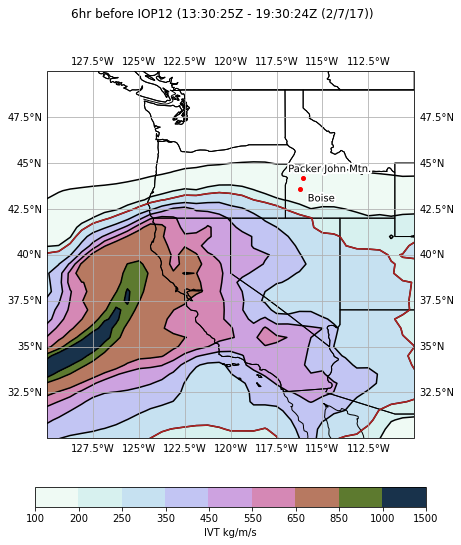

<Figure size 432x288 with 0 Axes>

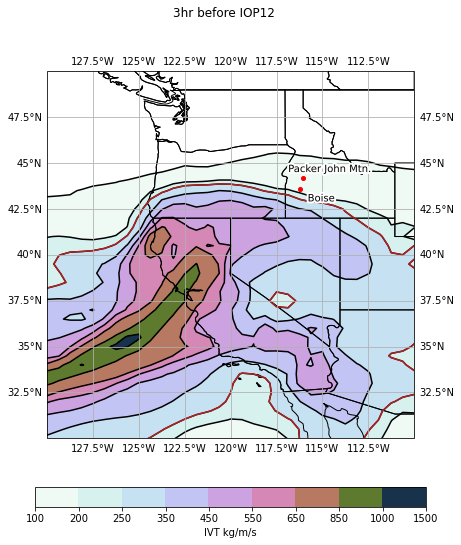

<Figure size 432x288 with 0 Axes>

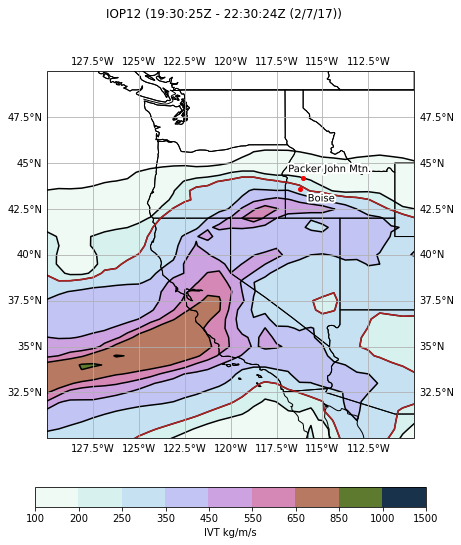

<Figure size 432x288 with 0 Axes>

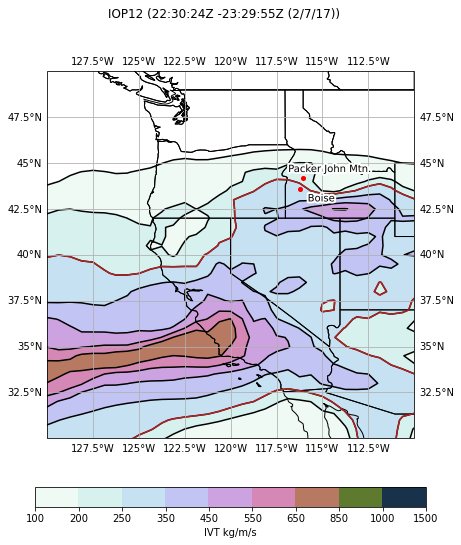

<Figure size 432x288 with 0 Axes>

In [109]:
#for i in range (x):
Titles=[
        '24hr before IOP12 (19:30:25Z(2/6/17) - 01:30:24Z(2/7/17))',
        '21hr before IOP12',
        '18hr before IOP12 (01:30:25Z - 7:30:24Z (2/7/17)) ',
        '15hr before IOP12',
        '12hr before IOP12 (07:30:25Z - 13:30:24Z (2/7/17)) ',
        '9hr beforeIOP12',
        '6hr before IOP12 (13:30:25Z - 19:30:24Z (2/7/17)) ',
        '3hr before IOP12',
        'IOP12 (19:30:25Z - 22:30:24Z (2/7/17))',
        'IOP12 (22:30:24Z -23:29:55Z (2/7/17))',
        '3hr after IOP12 end',
        '6hr after IOP12 end (23:29:56Z(2/7/17)-05:29:55Z(2/8/17))',
        '12hr after IOP12 end (05:29:56Z - 11:29:55Z (2/8/17))',
        '24hr after IOP12 end (22:30:25Z - 23:29:55Z (2/8/17)']
    

for i in range(300,304):
    dummy= IVT[i,:,:]
    contPlot(IVTLon, IVTLat, dummy, Titles[i-294])
    

In [248]:
beglat=np.where(IVTLat==44)
endlat=np.where(IVTLat==44.5)
beglon=np.where(np.amin(np.abs(IVTLon-116)) == np.abs(IVTLon-116))
endlon=np.where(np.amin(np.abs(IVTLon-117)) == np.abs(IVTLon-117))

#print(type(beglat),beglat.shape)
#print(type(beglon),beglon.shape)
#print(type(beglon.reshape(-1,1).astype('int')))
#print(beglon)
#beglon=beglon.reshape(-1,1).astype('int')
#print(beglon.indices[0])
#print(type(beglon))
#print(beglon[0])
#print(endlon)
#print(beglat)
#print(endlat)
#print(type(IVTLon))

#print(type(IVT))
#avIVT = np.mean(np.mean(IVT[294:312, beglon:endlon, beglat:endlat],2),2)
avIVT = np.mean(IVT[294:312, beglon.astype('int'):475, 268:269],(1,2))
#print(avIVT.shape)

AttributeError: 'tuple' object has no attribute 'astype'

(1, 1)

In [73]:
#**********************************************************************************************

In [ ]:
#Plot Skew T 

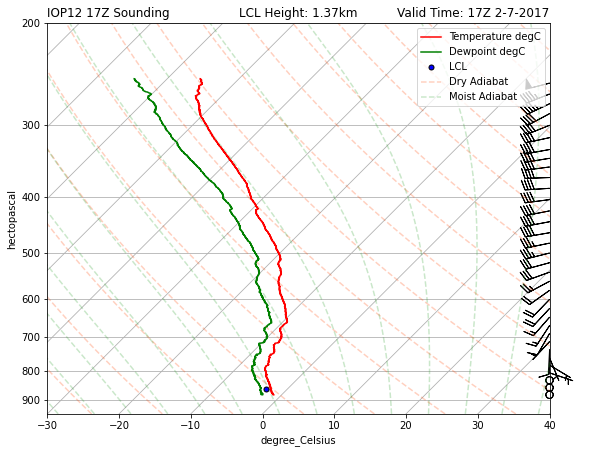

In [14]:
fig = plt.figure(figsize =(9,9))
skew = metpy.plots.SkewT(fig, rotation= 45)

skew.plot(pressure_hPa_17Z, temperatureC_17Z, 'r', label = 'Temperature degC')
skew.plot(pressure_hPa_17Z, Td_17Z, 'g', label = 'Dewpoint degC')
skew.plot_barbs(pressure_hPa_17Z[::50], u_17Z[::50],v_17Z[::50], y_clip_radius = 0.03)

lcl_pressure17Z, lcl_temperature17Z = mpcalc.lcl(pressure_hPa_17Z[0], temperatureC_17Z[0], Td_17Z[0])
skew.plot(lcl_pressure17Z, lcl_temperature17Z, 'ko', markerfacecolor = 'blue', markersize = 5, label = 'LCL')
lcl_hgt_m = np.round(mpcalc.pressure_to_height_std(lcl_pressure17Z), decimals=3).to(units.meter)
lcl_hgt_Km = np.round(mpcalc.pressure_to_height_std(lcl_pressure17Z), decimals=3)



#profile = mpcalc.parcel_profile(pressure_hPa_17Z, temperatureC_17Z[0], Td_17Z[0]).to('degC')
#skew.plot(pressure_hPa_17Z, profile, 'k', linewidth =2)

skew.ax.set_xlim(-30,40)
skew.ax.set_ylim(950,200)


skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered', label = 'Dry Adiabat')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green', label = 'Moist Adiabat')

# Add title
plt.title('IOP12 17Z Sounding', loc='left')
plt.title('Valid Time: 17Z 2-7-2017', loc='right')
plt.title('LCL Height: 1.37km')
#print(lcl_hgt_Km)

plt.legend (loc='best')
#plt.savefig('SkewT_17Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

NameError: name 'pressure_hPa_20Z' is not defined

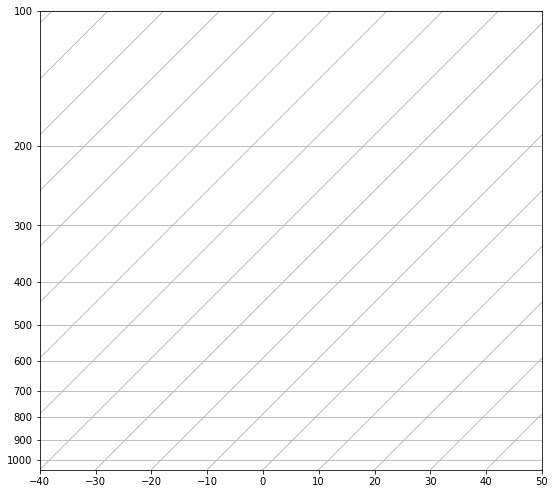

In [15]:
fig = plt.figure(figsize =(9,9))
skew = metpy.plots.SkewT(fig, rotation= 45)

skew.plot(pressure_hPa_20Z, temperatureC_20Z, 'r', label = 'Temperature degC')
skew.plot(pressure_hPa_20Z, Td_20Z, 'g', label = 'Dewpoint degC')
skew.plot_barbs(pressure_hPa_20Z[::50], u_20Z[::50],v_20Z[::50], y_clip_radius = 0.03)

lcl_pressure20Z, lcl_temperature20Z = mpcalc.lcl(pressure_hPa_20Z[0], temperatureC_20Z[0], Td_20Z[0])
skew.plot(lcl_pressure20Z, lcl_temperature20Z, 'ko', markerfacecolor = 'blue', markersize = 5, label = 'LCL')
lcl_hgt_m = np.round(mpcalc.pressure_to_height_std(lcl_pressure20Z), decimals=3).to(units.meter)
lcl_hgt_Km = np.round(mpcalc.pressure_to_height_std(lcl_pressure20Z), decimals=3)



#profile = mpcalc.parcel_profile(pressure_hPa_17Z, temperatureC_17Z[0], Td_17Z[0]).to('degC')
#skew.plot(pressure_hPa_17Z, profile, 'k', linewidth =2)

skew.ax.set_xlim(-30,40)
skew.ax.set_ylim(950,200)


skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered', label = 'Dry Adiabat')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green', label = 'Moist Adiabat')

# Add title
plt.title('IOP12 20Z Sounding', loc='left')
plt.title('Valid Time: 20Z 2-7-2017', loc='right')
plt.title('LCL Height: 1.45km')
print(lcl_hgt_Km)

plt.legend (loc='best')
#plt.savefig('SkewT_20Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

ValueError: The values in t must be monotonically increasing or monotonically decreasing; repeated values are allowed.

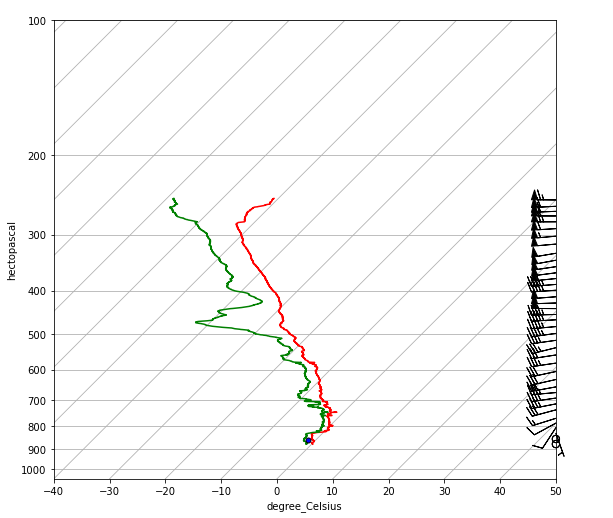

In [137]:
fig = plt.figure(figsize =(9,9))
skew = metpy.plots.SkewT(fig, rotation= 45)

skew.plot(pressure_hPa_22Z, temperatureC_22Z, 'r', label = 'Temperature degC')
skew.plot(pressure_hPa_22Z, Td_22Z, 'g', label = 'Dewpoint degC')
skew.plot_barbs(pressure_hPa_22Z[::50], u_22Z[::50],v_22Z[::50], y_clip_radius = 0.03)

lcl_pressure22Z, lcl_temperature22Z = mpcalc.lcl(pressure_hPa_22Z[0], temperatureC_22Z[0], Td_22Z[0])
skew.plot(lcl_pressure22Z, lcl_temperature22Z, 'ko', markerfacecolor = 'blue', markersize = 5, label = 'LCL')
lcl_hgt_m = np.round(mpcalc.pressure_to_height_std(lcl_pressure22Z), decimals=3).to(units.meter)
lcl_hgt_Km = np.round(mpcalc.pressure_to_height_std(lcl_pressure22Z), decimals=3)

profile = mpcalc.parcel_profile(pressure_hPa_22Z, temperatureC_22Z[0], Td_22Z[0]).to('degC')
# skew.plot(pressure_hPa_22Z, profile, 'k', linewidth =2)

# skew.ax.set_xlim(-30,40)
# skew.ax.set_ylim(950,200)LLl


# skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
#                        alpha=0.25, color='orangered', label = 'Dry Adiabat')
# skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
#                          alpha=0.25, color='tab:green', label = 'Moist Adiabat')

# # Add title
# plt.title('IOP12 22Z Sounding', loc='left')
# plt.title('Valid Time: 22Z 2-7-2017', loc='right')
# plt.title('LCL Height: 1.34km')
# print(lcl_hgt_Km)

# plt.legend (loc='best')
# #plt.savefig('SkewT_20Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

In [74]:
#Plot Sounding Data: Wind Direction vs Pressure 

In [ ]:
#Plotting all wind direction sounding times together

In [ ]:
#Plotting all wind speed sounding times seperatley 

In [ ]:
#Plotting all wind speed sounding times together

<function matplotlib.pyplot.show(close=None, block=None)>

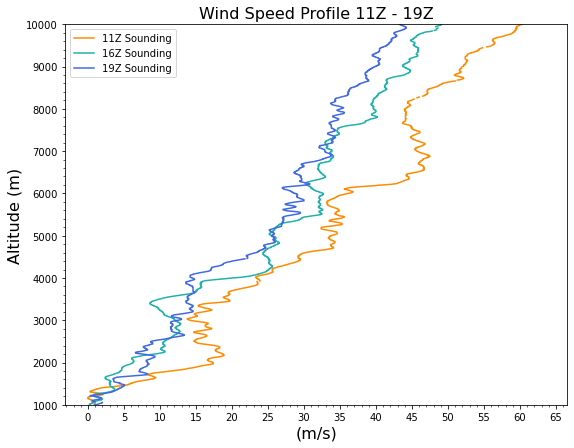

In [27]:
fig, ax = plt.subplots()
plt.title('Wind Speed Profile 11Z - 19Z', fontsize = 16)
fig.set_size_inches(9,7)

plt.plot(WindS_11Z, height11Z, markersize=1, color ='darkorange', label ='11Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,50, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(WindS_16Z, height16Z, markersize=1, color ='lightseagreen', label ='16Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,50, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(WindS_19Z, height19Z, markersize=1, color ='royalblue', label ='19Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('(m/s)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(0,50, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#plt.axhline(y=3000, linestyle='--', color = 'black', label = '20Z Layer')
#plt.axhline(y=4100, linestyle='--', color = 'black' )
#plt.axhline(y=2000, linestyle='--', color = 'darkslategrey', label = '22Z Layer' )
#plt.axhline(y=2700, linestyle='--', color = 'darkslategrey')


plt.legend (loc='best')
#plt.savefig('Wind Speed_17Z-22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

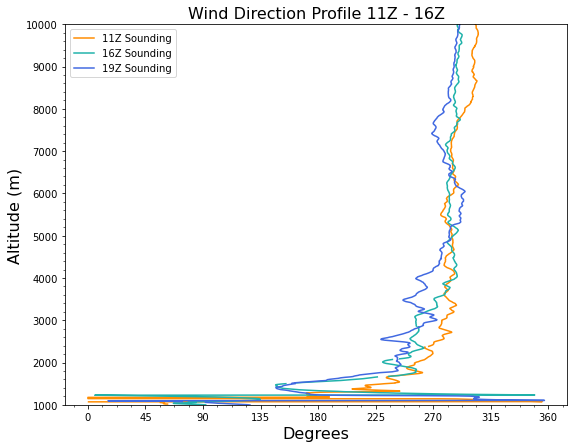

In [28]:
fig, ax = plt.subplots()
plt.title('Wind Direction Profile 11Z - 16Z', fontsize = 16)
fig.set_size_inches(9,7)

plt.plot(WindD_11Z, height11Z, markersize=1, color ='darkorange', label ='11Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Direction (Degrees)')
ax.xaxis.set_ticks(np.arange(70,270, 30))
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(WindD_16Z, height16Z, markersize=1, color ='lightseagreen', label ='16Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Direction (Degrees)')
ax.xaxis.set_ticks(np.arange(70,270, 30))
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(WindD_19Z, height19Z, markersize=1, color ='royalblue', label ='19Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees', fontsize = 16)
ax.xaxis.set_ticks(np.arange(70,270,30))
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#plt.axhline(y=3000, linestyle='--', color = 'black', label = '20Z Layer')
#plt.axhline(y=4100, linestyle='--', color = 'black' )
#plt.axhline(y=2000, linestyle='--', color = 'darkslategrey', label = '22Z Layer' )
#plt.axhline(y=2700, linestyle='--', color = 'darkslategrey')


plt.legend (loc='best')
#plt.savefig('Wind Direction_17Z-22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

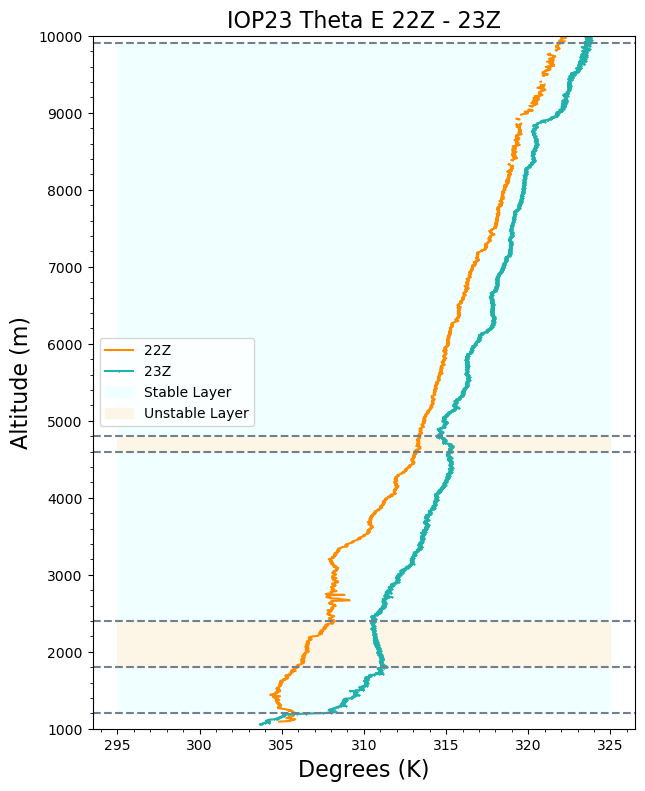

In [21]:
fig, ax = plt.subplots()
plt.title('IOP23 Theta E 22Z - 23Z', fontsize = 16)
fig.set_size_inches(7,9)

#plt.plot(Theta_E_19Z, height19Z, markersize=0.5, color ='darkorange', label ='19Z', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees (Kelvin)', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(295,325, 5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(500))
#ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Theta_E_22Z, height22Z, markersize=0.5, color ='darkorange', label ='22Z', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Kelvin)')
ax.xaxis.set_ticks(np.arange(295,325, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Theta_E_23Z, height23Z, markersize=1, color ='lightseagreen', label ='23Z', marker ='*')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (K)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(295,330,10))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add shaded bars over AR impacted layers
plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=1200, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 9900
y4 = 1200
ax.fill_between(x2,y3,y4, color = 'azure', label = 'Stable Layer')

#Add shaded bars over AR impacted layers
plt.axhline(y=2400, linestyle='--', color = 'slategrey')
plt.axhline(y=1800, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 1800
y4 = 2400
ax.fill_between(x2,y3,y4, color = 'oldlace', label = 'Unstable Layer')

#Add shaded bars over AR impacted layers
plt.axhline(y=4600, linestyle='--', color = 'slategrey')
plt.axhline(y=4800, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 4800
y4 = 4600
ax.fill_between(x2,y3,y4, color = 'oldlace')


plt.legend (loc='best')
plt.savefig('IOP23 ThetaE Part 2 .jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

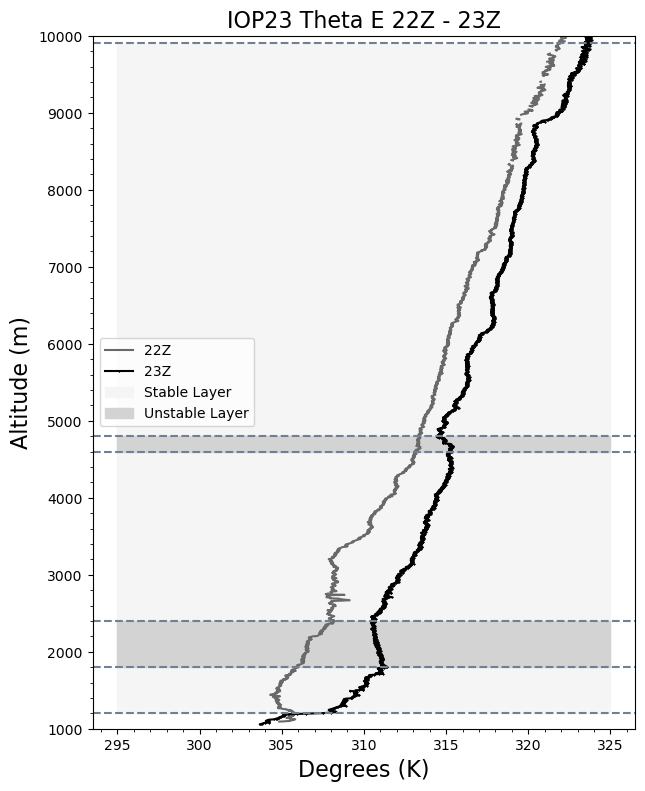

In [23]:
fig, ax = plt.subplots()
plt.title('IOP23 Theta E 22Z - 23Z', fontsize = 16)
fig.set_size_inches(7,9)

#plt.plot(Theta_E_19Z, height19Z, markersize=0.5, color ='darkorange', label ='19Z', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees (Kelvin)', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(295,325, 5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(500))
#ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Theta_E_22Z, height22Z, markersize=0.5, color ='dimgrey', label ='22Z', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Kelvin)')
ax.xaxis.set_ticks(np.arange(295,325, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Theta_E_23Z, height23Z, markersize=1, color ='black', label ='23Z', marker ='*')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (K)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(295,330,10))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add shaded bars over AR impacted layers
plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=1200, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 9900
y4 = 1200
ax.fill_between(x2,y3,y4, color = 'whitesmoke', label = 'Stable Layer')

#Add shaded bars over AR impacted layers
plt.axhline(y=2400, linestyle='--', color = 'slategrey')
plt.axhline(y=1800, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 1800
y4 = 2400
ax.fill_between(x2,y3,y4, color = 'lightgrey', label = 'Unstable Layer')

#Add shaded bars over AR impacted layers
plt.axhline(y=4600, linestyle='--', color = 'slategrey')
plt.axhline(y=4800, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 4800
y4 = 4600
ax.fill_between(x2,y3,y4, color = 'lightgrey')


plt.legend (loc='best')
#plt.savefig('IOP23 ThetaE Part 2 .jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

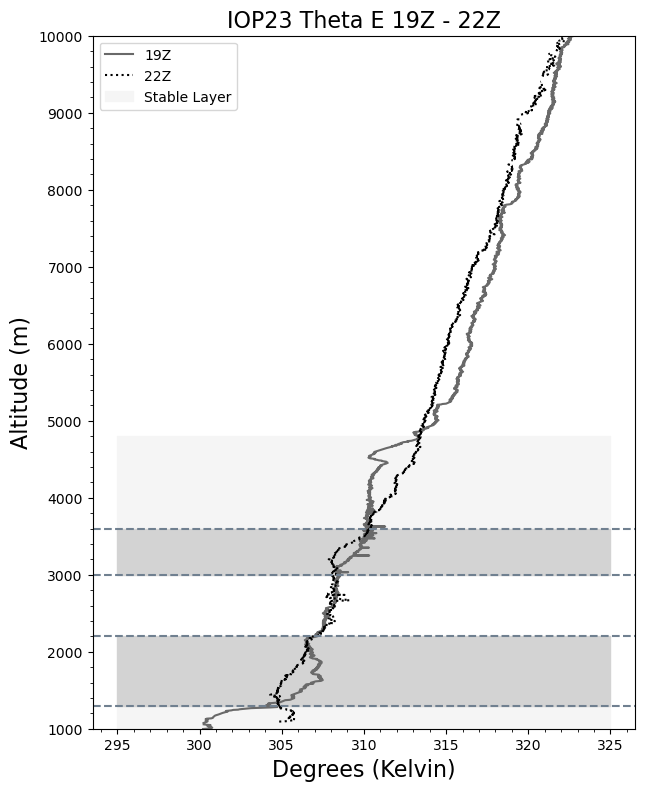

In [12]:
fig, ax = plt.subplots()
plt.title('IOP23 Theta E 19Z - 22Z', fontsize = 16)
fig.set_size_inches(7,9)

plt.plot(Theta_E_19Z, height19Z, markersize=0.5, color ='darkorange', label ='19Z', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (Kelvin)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(295,325, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Theta_E_22Z, height22Z, markersize=20, color ='lightseagreen', label ='22Z', linestyle = 'dotted')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Kelvin)')
ax.xaxis.set_ticks(np.arange(295,325, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


#plt.plot(Theta_E_23Z, height23Z, markersize=0.5, color ='royalblue', label ='23Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees (K)', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(295,330,10))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add shaded bars over AR impacted layers


#plt.axhline(y=5200, linestyle='--', color = 'slategrey')
plt.axhline(y=3600, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 4800
y4 = 3600
ax.fill_between(x2,y3,y4, color = 'whitesmoke', label = 'Stable Layer')

#plt.axhline(y=3600, linestyle='--', color = 'slategrey' )
x2 = (295,325)
y3 = 3000
y4 = 3600
ax.fill_between(x2,y3,y4, color = 'lightgrey')

#plt.axhline(y=4000, linestyle='--', color = 'slategrey')
plt.axhline(y=3000, linestyle='--', color = 'slategrey' )
x3 = (295,325)
y5 = 1300
y6 = 0
ax.fill_between(x3,y5,y6, color = 'whitesmoke')

plt.axhline(y=2200, linestyle='--', color = 'slategrey')
plt.axhline(y=1300, linestyle='--', color = 'slategrey' )
x3 = (295,325)
y5 = 2200
y6 = 1300
ax.fill_between(x3,y5,y6, color = 'lightgrey')

plt.legend (loc='best')
#plt.savefig('IOP23 ThetaE Part 1 EWSS.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

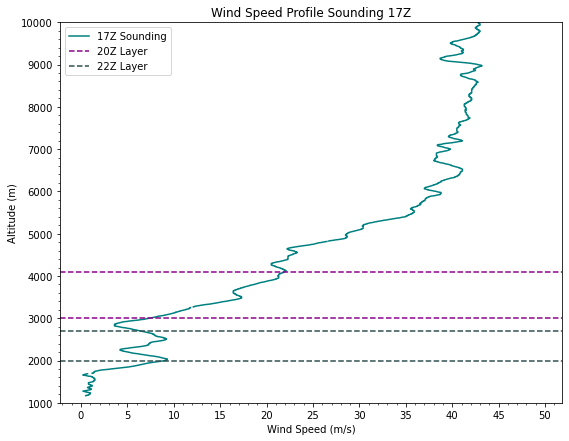

In [58]:
fig, ax = plt.subplots()
plt.title('Wind Speed Profile Sounding 17Z')
fig.set_size_inches(9,7)

plt.plot(WindS_17Z, height17Z, markersize=1, color ='teal', label ='17Z Sounding', linestyle = 'solid')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,50, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'darkmagenta', label = '20Z Layer')
plt.axhline(y=4100, linestyle='--', color = 'darkmagenta' )
plt.axhline(y=2000, linestyle='--', color = 'darkslategrey', label = '22Z Layer' )
plt.axhline(y=2700, linestyle='--', color = 'darkslategrey')


plt.legend (loc='best')
#plt.savefig('Wind Speed_17Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

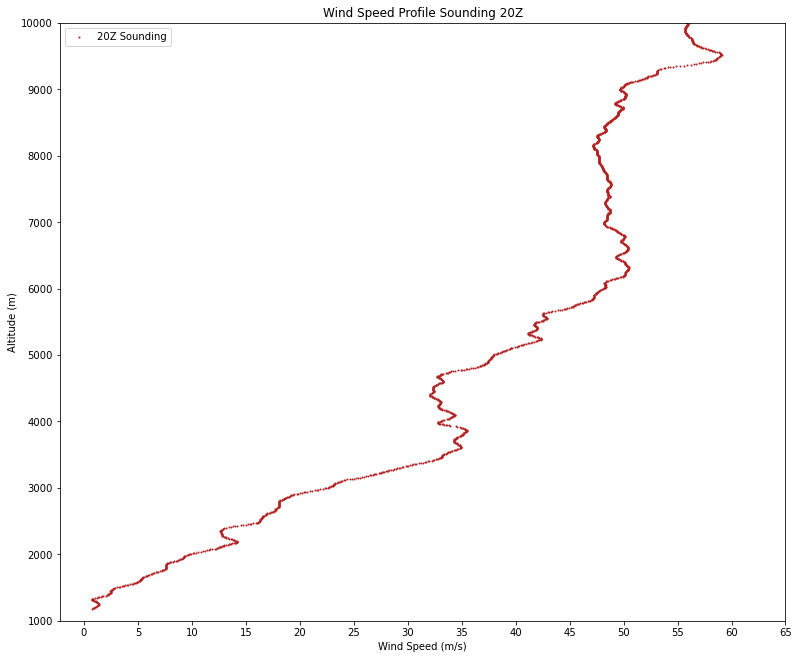

In [52]:
fig, ax = plt.subplots()
plt.title('Wind Speed Profile Sounding 20Z')
fig.set_size_inches(13,11)


plt.scatter(WindS_20Z, height20Z, s=1, color ='firebrick', label ='20Z Sounding')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,70, 5))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly


plt.legend (loc='best')
plt.savefig('Wind Speed_20Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

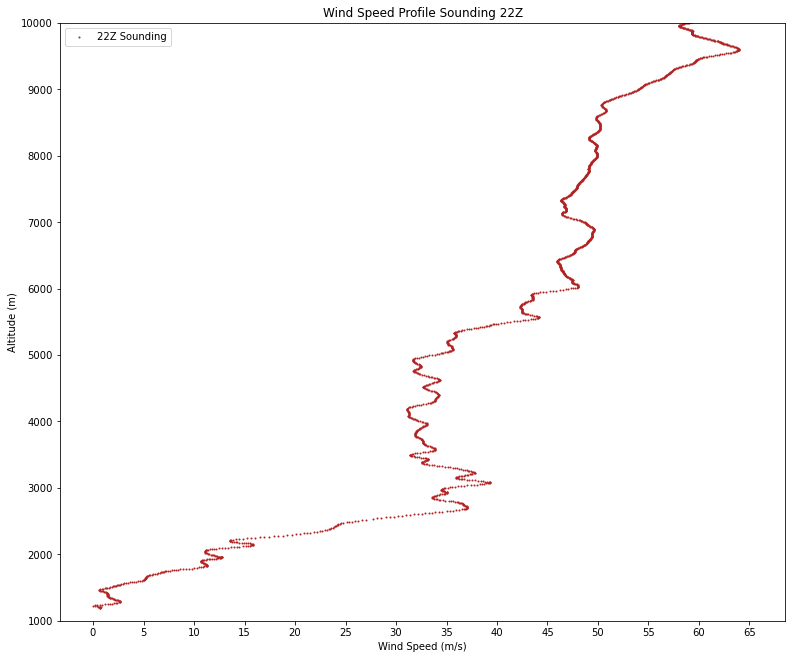

In [53]:
fig, ax = plt.subplots()
plt.title('Wind Speed Profile Sounding 22Z')
fig.set_size_inches(13,11)


plt.scatter(WindS_22Z, height22Z, s=1, color ='firebrick', label ='22Z Sounding')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,70, 5))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('Wind Speed_22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

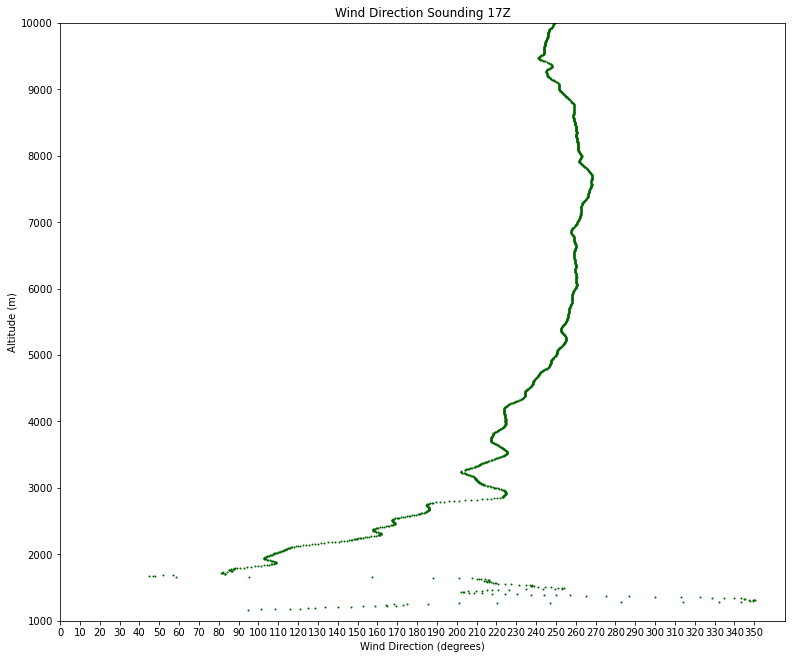

In [83]:
fig, ax = plt.subplots()
plt.title('Wind Direction Sounding 17Z')
fig.set_size_inches(13,11)


plt.scatter(WindD_17Z, height17Z, s=1, color ='darkgreen')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Direction (degrees)')
ax.xaxis.set_ticks(np.arange(0,360, 10))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#plt.legend (loc='best')
plt.savefig('Wind Direction 17Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

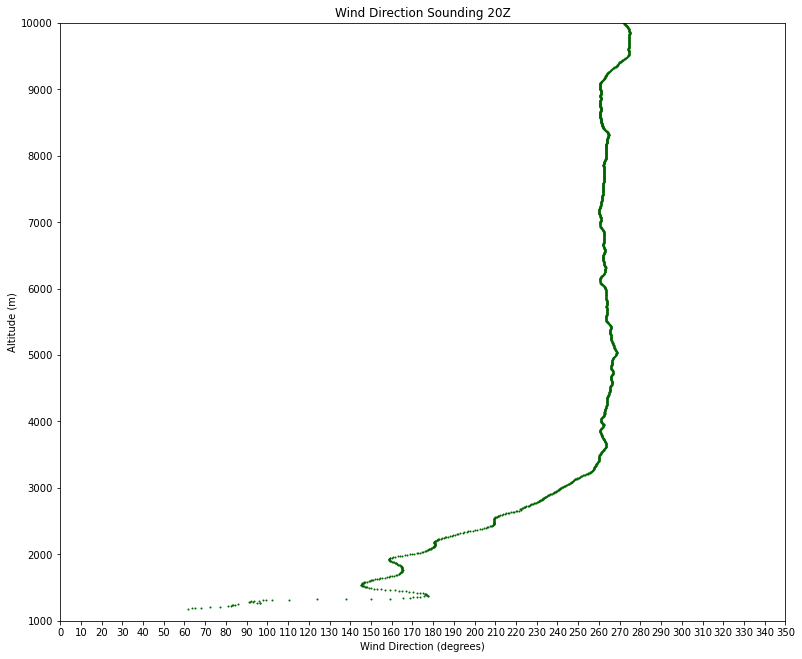

In [84]:
fig, ax = plt.subplots()
plt.title('Wind Direction Sounding 20Z')
fig.set_size_inches(13,11)


plt.scatter(WindD_20Z, height20Z, s=1, color ='darkgreen')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Direction (degrees)')
ax.xaxis.set_ticks(np.arange(0,360, 10))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#plt.legend (loc='best')
plt.savefig('Wind Direction 20Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

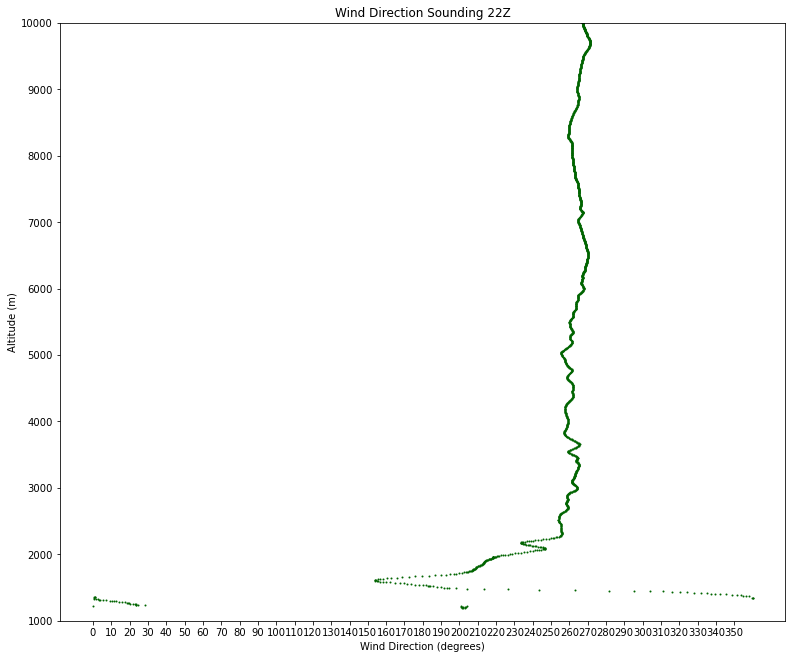

In [85]:
fig, ax = plt.subplots()
plt.title('Wind Direction Sounding 22Z')
fig.set_size_inches(13,11)


plt.scatter(WindD_22Z, height22Z, s=1, color ='darkgreen')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude (m)')
plt.xlabel('Wind Direction (degrees)')
ax.xaxis.set_ticks(np.arange(0,360, 10))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#plt.legend (loc='best')
plt.savefig('Wind Direction_22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

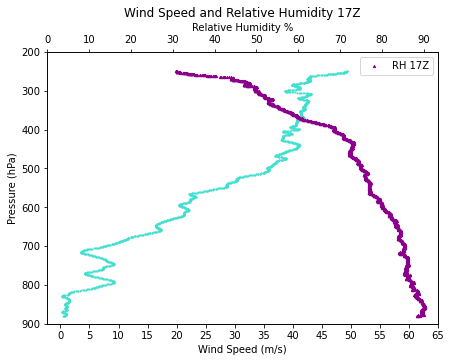

In [75]:
fig, ax = plt.subplots()
plt.title('Wind Speed and Relative Humidity 17Z')
fig.set_size_inches(7,5)

plt.scatter(WindS_17Z, P_17Z, s=1, color ='turquoise', label ='17Z Sounding')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,70, 5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(RH_17Z, P_17Z, s=5, color ='darkmagenta', label ='RH 17Z', marker = "^")  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax1.xaxis.set_ticks(np.arange(0,100,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('Wind_RH_17Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

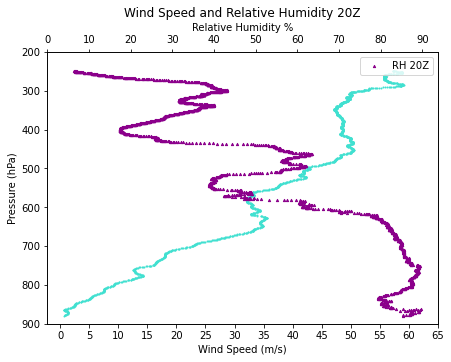

In [76]:
fig, ax = plt.subplots()
plt.title('Wind Speed and Relative Humidity 20Z')
fig.set_size_inches(7,5)

plt.scatter(WindS_20Z, P_20Z, s=1, color ='turquoise', label ='20Z Sounding')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,70, 5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(RH_20Z, P_20Z, s=5, color ='darkmagenta', label ='RH 20Z', marker = "^" )  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax1.xaxis.set_ticks(np.arange(0,100,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('Wind_RH_20Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

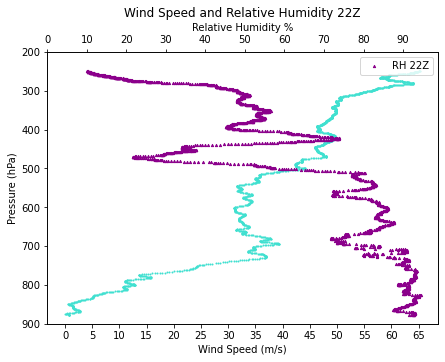

In [77]:
fig, ax = plt.subplots()
plt.title('Wind Speed and Relative Humidity 22Z')
fig.set_size_inches(7,5)

plt.scatter(WindS_22Z, P_22Z, s=1, color ='turquoise', label ='22Z Sounding')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Wind Speed (m/s)')
ax.xaxis.set_ticks(np.arange(0,70, 5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(RH_22Z, P_22Z, s=5, color ='darkmagenta', label ='RH 22Z',marker = "^")  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax1.xaxis.set_ticks(np.arange(0,100,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('Wind_RH_22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

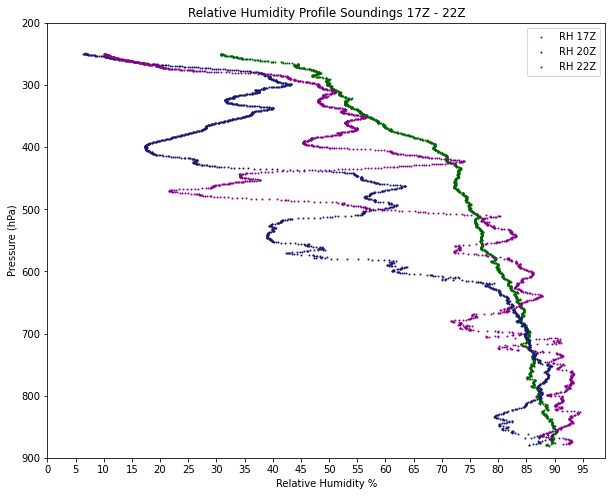

In [79]:
fig, ax = plt.subplots()
plt.title('Relative Humidity Profile Soundings 17Z - 22Z')
fig.set_size_inches(10,8)

plt.scatter(RH_17Z, P_17Z, s=1, color ='darkgreen', label ='RH 17Z')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.scatter(RH_20Z, P_20Z, s=1, color ='midnightblue', label ='RH 20Z' )  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.scatter(RH_22Z, P_22Z, s=1, color ='darkmagenta', label ='RH 22Z',)  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Pressure (hPa)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.show

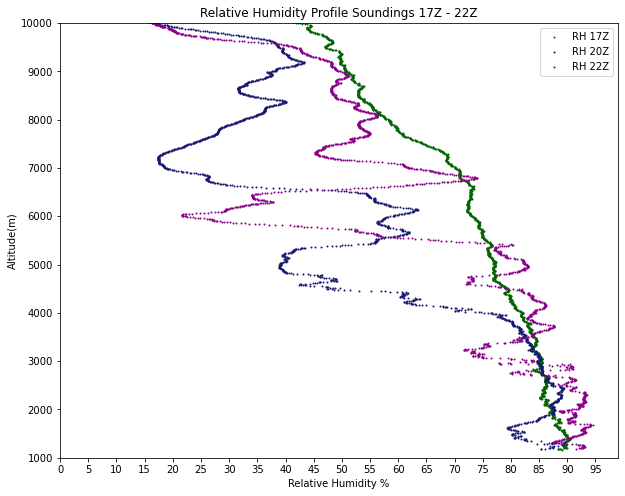

In [48]:
fig, ax = plt.subplots()
plt.title('Relative Humidity Profile Soundings 17Z - 22Z')
fig.set_size_inches(10,8)

plt.scatter(RH_17Z, height17Z, s=1, color ='darkgreen', label ='RH 17Z')  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude(m)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

plt.scatter(RH_20Z, height20Z, s=1, color ='midnightblue', label ='RH 20Z' )  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude(m)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

plt.scatter(RH_22Z, height22Z, s=1, color ='darkmagenta', label ='RH 22Z',)  #Skip row 0 which has headers, start at row 1 with data
plt.ylabel('Altitude(m)')
plt.xlabel('Relative Humidity %')
ax.xaxis.set_ticks(np.arange(0,100,5))
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.show
plt.savefig('RH 17Z - 22Z IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

In [ ]:
#pressureMb_22Z = P_22Z*units.mbar
#Theta_22Z = mpcalc.potential_temperature(pressureMb_22Z, temperatureK_22Z)
#Theta_E_22Z = mpcalc.equivalent_potential_temperature(pressureMb_22Z, temperatureK_22Z, Td_22Z)

<function matplotlib.pyplot.show(close=None, block=None)>

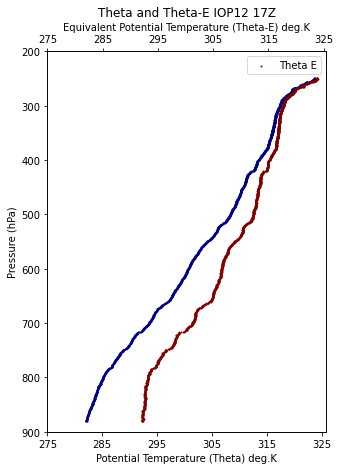

In [81]:
fig, ax = plt.subplots()
plt.title('Theta and Theta-E IOP12 17Z')
fig.set_size_inches(5,7)

plt.scatter(Theta_17Z, P_17Z, s=1, color ='navy', label ='Theta')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Potential Temperature (Theta) deg.K')
ax.xaxis.set_ticks(np.arange(275,330, 10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(Theta_E_17Z, P_17Z, s=1, color ='maroon', label ='Theta E')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Equivalent Potential Temperature (Theta-E) deg.K')
ax1.xaxis.set_ticks(np.arange(275,330,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('ThetaE_17Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

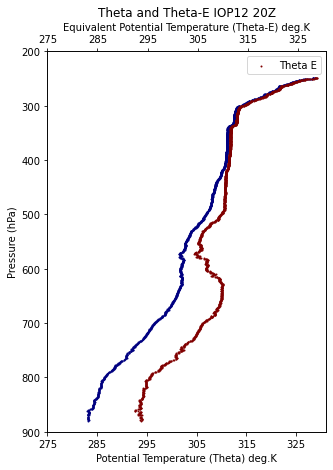

In [82]:
fig, ax = plt.subplots()
plt.title('Theta and Theta-E IOP12 20Z')
fig.set_size_inches(5,7)

plt.scatter(Theta_20Z, P_20Z, s=1, color ='navy', label ='Theta')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Potential Temperature (Theta) deg.K')
ax.xaxis.set_ticks(np.arange(275,330, 10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(Theta_E_20Z, P_20Z, s=1, color ='maroon', label ='Theta E')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Equivalent Potential Temperature (Theta-E) deg.K')
ax1.xaxis.set_ticks(np.arange(275,330,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
plt.savefig('ThetaE_20Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

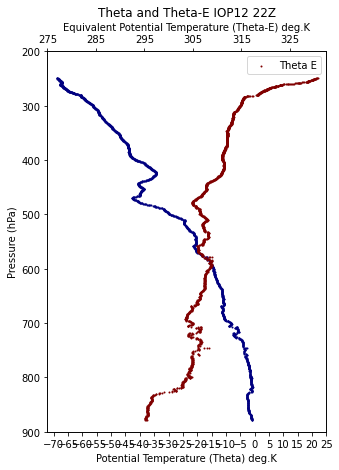

In [182]:
fig, ax = plt.subplots()
plt.title('Theta and Theta-E IOP12 22Z')
fig.set_size_inches(5,7)

plt.scatter(Td_22Z, P_22Z, s=1, color ='navy', label ='Theta')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Potential Temperature (Theta) deg.K')
ax.xaxis.set_ticks(np.arange(-70,30, 5))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.scatter(Theta_E_22Z, P_22Z, s=1, color ='maroon', label ='Theta E')  
plt.ylabel('Pressure (hPa)')
plt.xlabel('Equivalent Potential Temperature (Theta-E) deg.K')
ax1.xaxis.set_ticks(np.arange(275,330,10))
ax.set_ylim(900,200) #reverse Y axis to plot pressure correctly

plt.legend (loc='best')
#plt.savefig('ThetaE_22Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

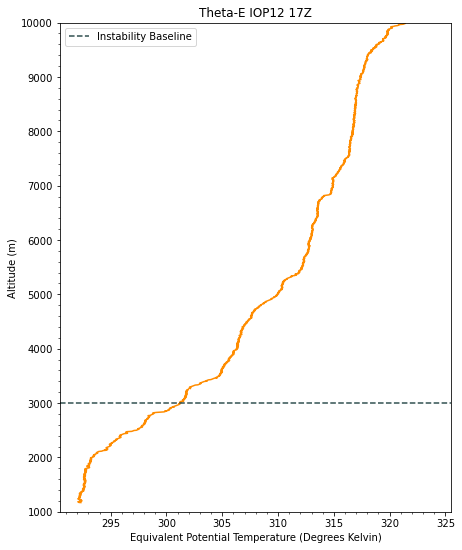

In [290]:
fig, ax = plt.subplots()
plt.title('Theta-E IOP12 17Z')
fig.set_size_inches(7,9)

#plt.scatter(Theta_17Z, height17Z, s=1, color ='teal', label ='Theta')  
#plt.ylabel('Altitude (m)')
#plt.xlabel('Potential Temperature (Theta) deg.K')
#ax.xaxis.set_ticks(np.arange(275,330, 10))
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Theta_E_17Z, height17Z, markersize=1, color ='darkorange', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Equivalent Potential Temperature (Degrees Kelvin)')
ax1.xaxis.set_ticks(np.arange(275,330,10))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'darkslategray', label = 'Instability Baseline')
#plt.axhline(y=4100, linestyle='--', color = 'darkslategray' )

plt.legend (loc='best')
plt.savefig('ThetaE_17Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

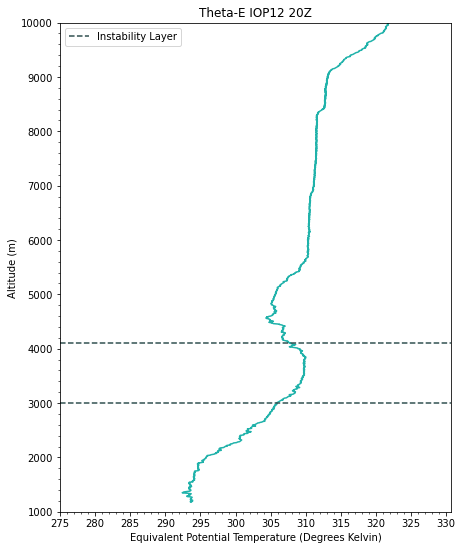

In [287]:
fig, ax = plt.subplots()
plt.title('Theta-E IOP12 20Z')
fig.set_size_inches(7,9)

#plt.scatter(Theta_20Z, height20Z, s=1, color ='teal', label ='Theta')  
#plt.ylabel('Altitude (m)')
#plt.xlabel('Potential Temperature (Theta) deg.K')
#ax.xaxis.set_ticks(np.arange(275,330, 10))
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Theta_E_20Z, height20Z, markersize=1, color ='lightseagreen', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Equivalent Potential Temperature (Degrees Kelvin)')
ax.xaxis.set_ticks(np.arange(275,330,10))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'darkslategray', label = 'Instability Layer')
plt.axhline(y=4100, linestyle='--', color = 'darkslategray' )

plt.legend (loc='best')
plt.savefig('ThetaE_20Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

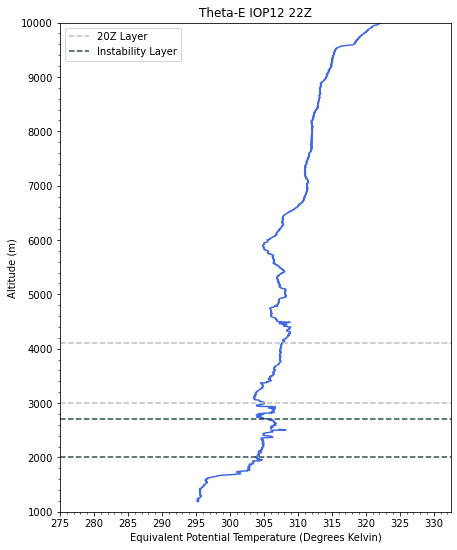

In [285]:
fig, ax = plt.subplots()
plt.title('Theta-E IOP12 22Z')
fig.set_size_inches(7,9)

#plt.scatter(Theta_22Z, height22Z, s=1, color ='teal', label ='Theta')  
#plt.ylabel('Altitude (m)')
#plt.xlabel('Potential Temperature (Theta) deg.K')
#ax.xaxis.set_ticks(np.arange(275,330, 10))
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Theta_E_22Z, height22Z, markersize=1, color ='royalblue', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Equivalent Potential Temperature (Degrees Kelvin)')
ax.xaxis.set_ticks(np.arange(275,330,10))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) 
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'silver', label = '20Z Layer')
plt.axhline(y=4100, linestyle='--', color = 'silver' )
plt.axhline(y=2000, linestyle='--', color = 'darkslategrey', label = 'Instability Layer' )
plt.axhline(y=2700, linestyle='--', color = 'darkslategrey')

plt.legend (loc='best')
plt.savefig('ThetaE_22Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

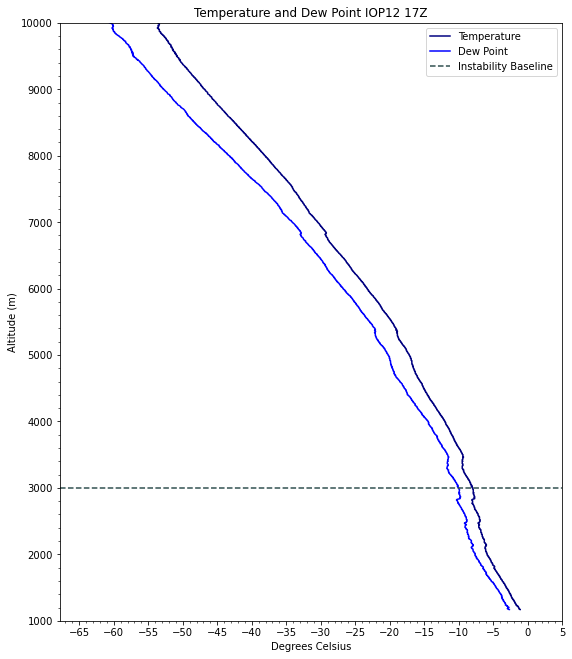

In [70]:
fig, ax = plt.subplots()
plt.title('Temperature and Dew Point IOP12 17Z')
fig.set_size_inches(9,11)

plt.plot(temperatureC_17Z, height17Z, markersize=6, color ='navy', label = 'Temperature', linestyle ='solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
#ax.xaxis.set_ticks(np.arange(-65,10, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Td_17Z, height17Z, markersize=5, color ='blue', label ='Dew Point', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'darkslategrey', label = 'Instability Baseline')

plt.legend (loc='best')

plt.savefig('Temp_Td_17Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

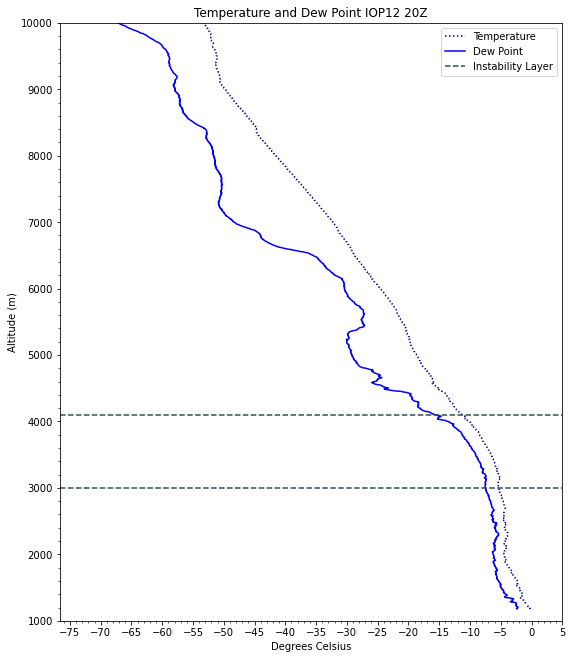

In [68]:
fig, ax = plt.subplots()
plt.title('Temperature and Dew Point IOP12 20Z')
fig.set_size_inches(9,11)

plt.plot(temperatureC_20Z, height20Z, markersize=5, color ='navy', label = 'Temperature', linestyle = 'dotted')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
#ax.xaxis.set_ticks(np.arange(-65,10, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Td_20Z, height20Z, markersize=5, color ='blue', label ='Dew Point', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'darkslategrey', label = 'Instability Layer')
plt.axhline(y=4100, linestyle='--', color = 'darkslategrey' )

plt.legend (loc='best')

plt.savefig('Temp_Td_20Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

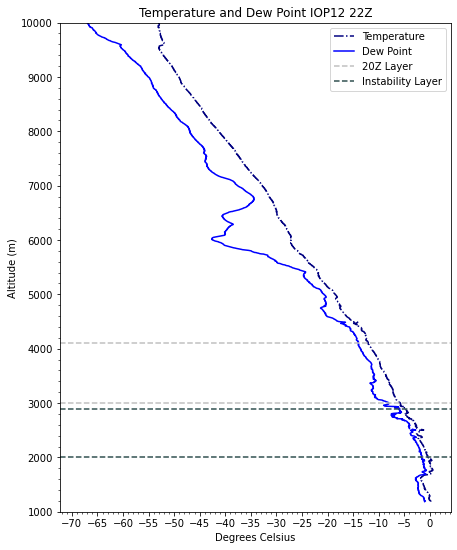

In [307]:
fig, ax = plt.subplots()
plt.title('Temperature and Dew Point IOP12 22Z')
fig.set_size_inches(7,9)

plt.plot(temperatureC_22Z, height22Z, markersize=5, color ='navy', label = 'Temperature', linestyle = 'dashdot')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
ax.xaxis.set_ticks(np.arange(-65,10, 5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax1 = ax.twiny()  # instantiate a second axes that shares the same y-axis

plt.plot(Td_22Z, height22Z, markersize=5, color ='blue', label ='Dew Point', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees Celsius')
ax1.xaxis.set_ticks(np.arange(-65,10,5))
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=3000, linestyle='--', color = 'silver', label = '20Z Layer')
plt.axhline(y=4100, linestyle='--', color = 'silver' )
plt.axhline(y=2000, linestyle='--', color = 'darkslategrey', label = 'Instability Layer' )
plt.axhline(y=2900, linestyle='--', color = 'darkslategrey')

plt.legend (loc='best')

plt.savefig('Temp_Td_22Z_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

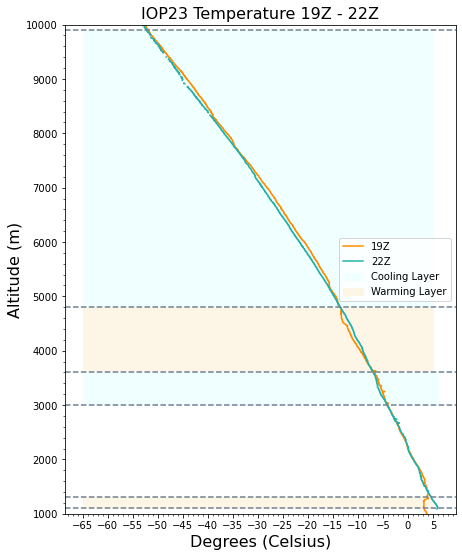

In [21]:
fig, ax = plt.subplots()
plt.title('IOP23 Temperature 19Z - 22Z', fontsize = 16)
fig.set_size_inches(7,9)

plt.plot(temperatureC_19Z, height19Z, markersize=5, color ='darkorange', label ='19Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (Celsius)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(temperatureC_22Z, height22Z, markersize=5, color ='lightseagreen', label ='22Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Celsius)')
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

 
##plt.plot(temperatureC_22Z, height22Z, markersize=5, color ='royalblue', label = '22Z', linestyle = 'solid')  
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees C', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(-65,10,5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add shaded bars over AR impacted layers
plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=4800, linestyle='--', color = 'slategrey' )
x = (-65,5)
y1 = 4800
y2 = 9900
ax.fill_between(x,y1,y2, color = 'azure', label = 'Cooling Layer')

#plt.axhline(y=5200, linestyle='--', color = 'slategrey')
plt.axhline(y=3600, linestyle='--', color = 'slategrey' )
x2 = (-65,5)
y3 = 4800
y4 = 3600
ax.fill_between(x2,y3,y4, color = 'oldlace', label = 'Warming Layer')

plt.axhline(y=1100, linestyle='--', color = 'slategrey')
plt.axhline(y=1300, linestyle='--', color = 'slategrey' )
x2 = (-65,5)
y3 = 1100
y4 = 1300
ax.fill_between(x2,y3,y4, color = 'oldlace')

#plt.axhline(y=4000, linestyle='--', color = 'slategrey')
plt.axhline(y=3000, linestyle='--', color = 'slategrey' )
x3 = (-65,6)
y5 = 3000
y6 = 3600
ax.fill_between(x3,y5,y6, color = 'azure')

plt.legend (loc='best', )
plt.savefig('IOP23 Temperature Part1 19Z - 22Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

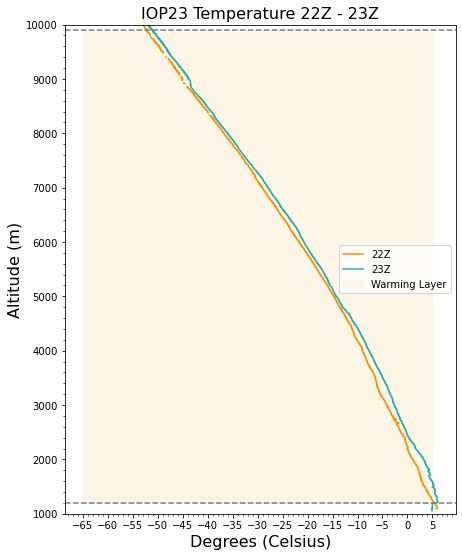

In [22]:
fig, ax = plt.subplots()
plt.title('IOP23 Temperature 22Z - 23Z', fontsize = 16)
fig.set_size_inches(7,9)

plt.plot(temperatureC_22Z, height22Z, markersize=5, color ='darkorange', label ='22Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (Celsius)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(temperatureC_23Z, height23Z, markersize=5, color ='lightseagreen', label ='23Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Celsius)')
ax.xaxis.set_ticks(np.arange(-65,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

 
##plt.plot(temperatureC_22Z, height22Z, markersize=5, color ='royalblue', label = '22Z', linestyle = 'solid')  
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees C', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(-65,10,5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_minor_locator(AutoMinorLocator())

#Add shaded bars over AR impacted layers
plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=1200, linestyle='--', color = 'slategrey' )
x = (-65,5)
y1 = 1200
y2 = 9900
ax.fill_between(x,y1,y2, color = 'oldlace', label = 'Warming Layer')

plt.legend (loc='best', )
plt.savefig('IOP23 Temperature Part2 22Z - 23Z.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

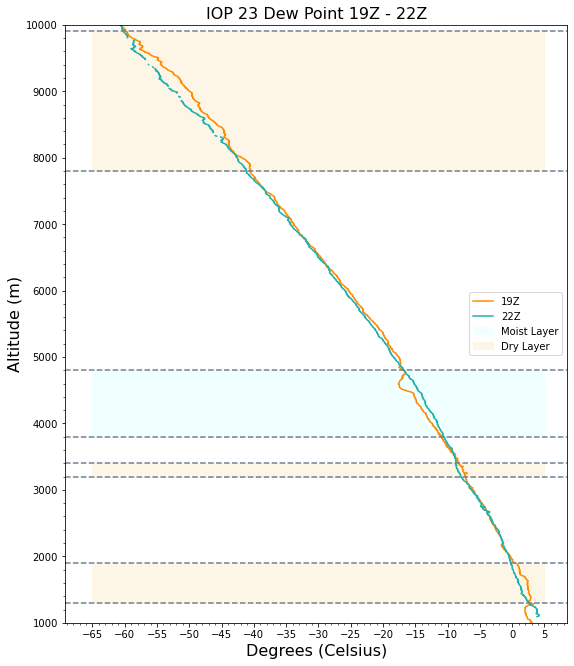

In [65]:
fig, ax = plt.subplots()
plt.title('IOP 23 Dew Point 19Z - 22Z', fontsize = 16)
fig.set_size_inches(9,11)


plt.plot(Td_19Z, height19Z, markersize=5, color ='darkorange', label ='19Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Celsius)')
ax.xaxis.set_ticks(np.arange(-60,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Td_22Z, height22Z, markersize=5, color ='lightseagreen', label ='22Z',  linestyle = 'solid')  
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (Celsius)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(-60,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

 
#plt.plot(Td_22Z, height22Z, markersize=5, color ='royalblue', label = '22Z', linestyle = 'solid')  
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees C', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(-65,10,5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=7800, linestyle='--', color = 'slategrey' )
x = (-65,5)
y1 = 9900
y2 = 7800
ax.fill_between(x,y1,y2, color = 'oldlace')


plt.axhline(y=3800, linestyle='--', color = 'slategrey')
plt.axhline(y=4800, linestyle='--', color = 'slategrey' )
x3 = (-65,5)
y5 = 3800
y6 = 4800
ax.fill_between(x3,y5,y6, color = 'azure', label = 'Moist Layer')

plt.axhline(y=3200, linestyle='--', color = 'slategrey')
plt.axhline(y=3400, linestyle='--', color = 'slategrey' )
x3 = (-65,5)
y5 = 3200
y6 = 3400
ax.fill_between(x3,y5,y6, color = 'oldlace', label = 'Dry Layer')

plt.axhline(y=1300, linestyle='--', color = 'slategrey')
plt.axhline(y=1900, linestyle='--', color = 'slategrey' )
x3 = (-65,5)
y5 = 1300
y6 = 1900
ax.fill_between(x3,y5,y6, color = 'oldlace')

plt.legend (loc='best', )

plt.savefig('IOP23 Dew Point Part 1.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

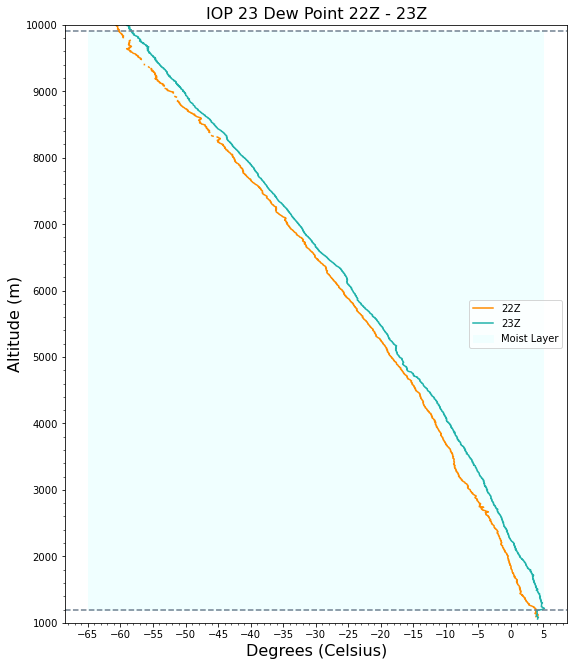

In [28]:
fig, ax = plt.subplots()
plt.title('IOP 23 Dew Point 22Z - 23Z', fontsize = 16)
fig.set_size_inches(9,11)


plt.plot(Td_22Z, height22Z, markersize=5, color ='darkorange', label ='22Z', linestyle = 'solid')  
plt.ylabel('Altitude (m)')
plt.xlabel('Degrees (Celsius)')
ax.xaxis.set_ticks(np.arange(-60,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())


plt.plot(Td_23Z, height23Z, markersize=5, color ='lightseagreen', label ='23Z',  linestyle = 'solid')  
plt.ylabel('Altitude (m)', fontsize = 16)
plt.xlabel('Degrees (Celsius)', fontsize = 16)
ax.xaxis.set_ticks(np.arange(-60,10,5))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

 
#plt.plot(Td_22Z, height22Z, markersize=5, color ='royalblue', label = '22Z', linestyle = 'solid')  
#plt.ylabel('Altitude (m)', fontsize = 16)
#plt.xlabel('Degrees C', fontsize = 16)
#ax.xaxis.set_ticks(np.arange(-65,10,5))
#ax.xaxis.set_major_locator(MultipleLocator(5))
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.set_ylim(1000,10000) #reverse Y axis to plot pressure correctly
#ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.axhline(y=9900, linestyle='--', color = 'slategrey')
plt.axhline(y=1200, linestyle='--', color = 'slategrey' )
x3 = (-65,5)
y5 = 1200
y6 = 9900
ax.fill_between(x3,y5,y6, color = 'azure', label = 'Moist Layer')

plt.legend (loc='best', )

plt.savefig('IOP23 Dew Point Part 2.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

In [ ]:
#Plot ARTMIP Rutz Variables

In [66]:
#SNOWIE IOP 12: 3267025 - 3281395 - 19:30:25 - 23:29:55
#Rutz First IOP Measurement: 3267025 - 3277824 19:30:25 - 22:30:24
#Rutz Second IOP Measurement: 3277825 - 3288625 22:30:25 - 2/8/17 01:30:25

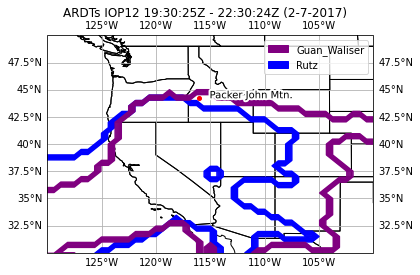

In [115]:
#Contour line plot of ARDTs IOP12 1st Half 
fig = plt.figure()
fig.suptitle('ARDTs IOP12 19:30:25Z - 22:30:24Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_1st_Half, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_1st_Half, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 1st Half.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()


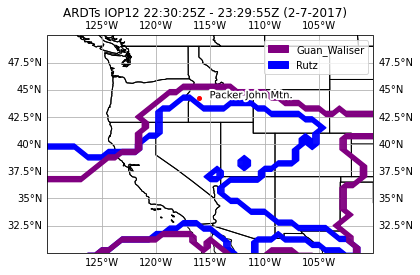

In [114]:
#Contour line plot of ARDTs IOP12 2nd Half 
fig = plt.figure()
fig.suptitle('ARDTs IOP12 22:30:25Z - 23:29:55Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_2nd_Half, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_2nd_Half, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 2nd Half.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()


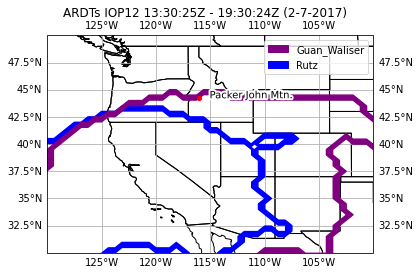

In [118]:
#Contour line plot of ARDTs IOP12 6 hours prior
fig = plt.figure()
fig.suptitle('ARDTs IOP12 13:30:25Z - 19:30:24Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_6P, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_6P, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 6 hours prior.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

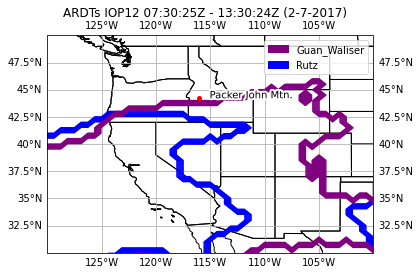

In [119]:
#Contour line plot of ARDTs IOP12 12 hours prior
fig = plt.figure()
fig.suptitle('ARDTs IOP12 07:30:25Z - 13:30:24Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_12P, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_12P, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 12 hours prior.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

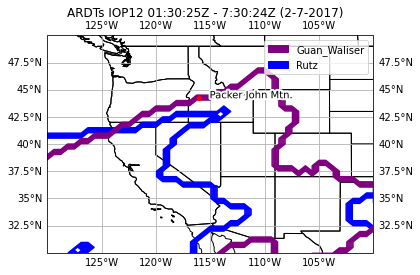

In [121]:
#Contour line plot of ARDTs IOP12 18 hours prior
fig = plt.figure()
fig.suptitle('ARDTs IOP12 01:30:25Z - 7:30:24Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_18P, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_18P, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 18 hours prior.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

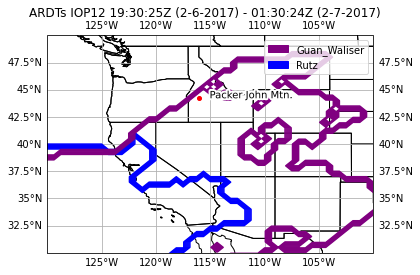

In [122]:
#Contour line plot of ARDTs IOP12 24 hours prior
fig = plt.figure()
fig.suptitle('ARDTs IOP12 19:30:25Z (2-6-2017) - 01:30:24Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_24P, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_24P, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 24 hours prior.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

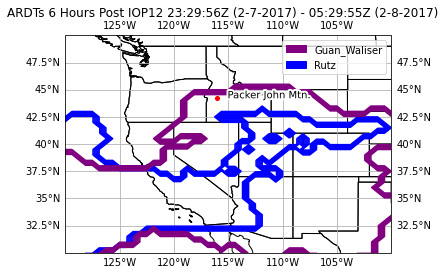

In [150]:
#Contour line plot of ARDTs IOP12 6 hours post
fig = plt.figure()
fig.suptitle('ARDTs 6 Hours Post IOP12 23:29:56Z (2-7-2017) - 05:29:55Z (2-8-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_6Post, transform=ccrs.PlateCarree(), colors = 'blue')

#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_6Post, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

#plt.savefig('IOP12 ARDTs 6 hours post.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

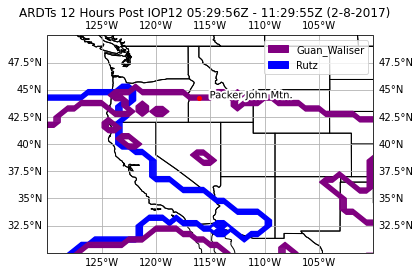

In [132]:
#Contour line plot of ARDTs IOP12 12 hours post
fig = plt.figure()
fig.suptitle('ARDTs 12 Hours Post IOP12 05:29:56Z - 11:29:55Z (2-8-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_12Post, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_12Post, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 12 hours post.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

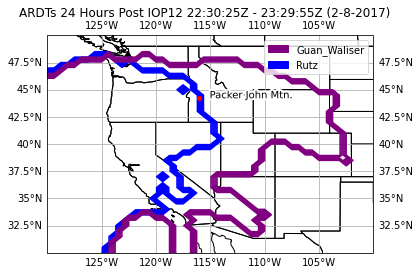

In [95]:
#Contour line plot of ARDTs IOP12 24 hours post
fig = plt.figure()
fig.suptitle('ARDTs 24 Hours Post IOP12 22:30:25Z - 23:29:55Z (2-8-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
text = plt.text(lon +1, lat -0, 'Packer John Mtn.',horizontalalignment='left',transform=ccrs.PlateCarree())
text.set_path_effects([PathEffects.withStroke(linewidth = 4, foreground = 'w')])
plt.draw()

#Plot Rutz ARDT
Rutz = ax.contour(RutzLon, RutzLat,Rutz_24Post, transform=ccrs.PlateCarree(), colors = 'blue')
#Plot Guan Waliser ARDT
Guan_Waliser = ax.contour(GWLon, GWLat,GW_24Post, transform=ccrs.PlateCarree(), colors = 'purple')

#red_patch =mpatches.Patch(color = 'red', label = 'Packer John Mtn.')
purple_patch = mpatches.Patch(color='purple', label = 'Guan_Waliser')
blue_patch = mpatches.Patch(color='blue', label = 'Rutz')
plt.legend(handles = [purple_patch, blue_patch], )

plt.savefig('IOP12 ARDTs 24 hours post.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

In [ ]:
#Rutz and Guan Waliser ARDTs plotted individually 

Text(-116.565833, 44.715833, 'Packer John Mtn.')

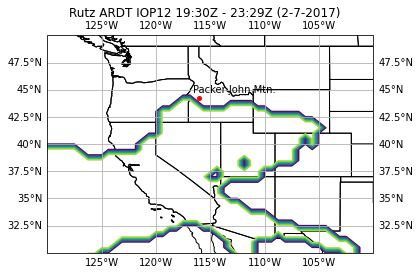

In [429]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Rutz ARDT IOP12 19:30Z - 23:29Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(RutzLon, RutzLat,Rutz_AR_Fix, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -0.5, lat +0.5, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#plt.savefig('Rutz_ARDT_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 


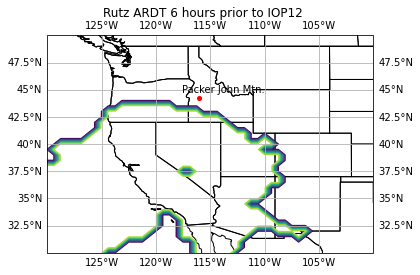

In [430]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Rutz ARDT 6 hours prior to IOP12 ')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(RutzLon, RutzLat,Rutz_6P, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1.5, lat +0.5, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#plt.savefig('Rutz_ARDT_IOP12_6P.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 

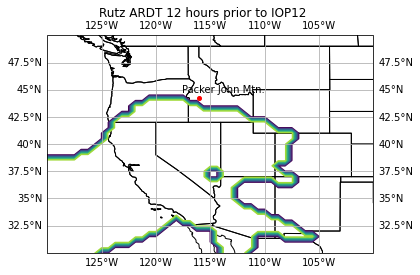

In [432]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Rutz ARDT 12 hours prior to IOP12 ')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(RutzLon, RutzLat,Rutz_12P, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1.5, lat +0.5, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

plt.savefig('Rutz_ARDT_IOP12_12P.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 

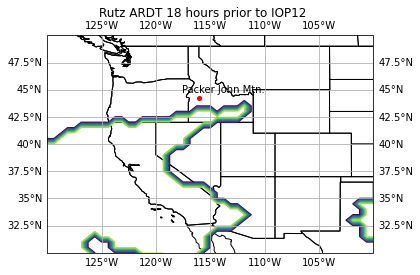

In [434]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Rutz ARDT 18 hours prior to IOP12 ')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(RutzLon, RutzLat,Rutz_18P, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1.5, lat +0.5, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

plt.savefig('Rutz_ARDT_IOP12_18P.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 

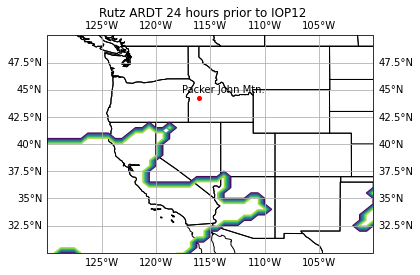

In [435]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Rutz ARDT 24 hours prior to IOP12 ')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(RutzLon, RutzLat,Rutz_24P, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1.5, lat +0.5, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

plt.savefig('Rutz_ARDT_IOP12_24P.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 

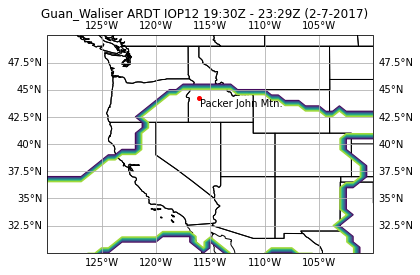

In [410]:
#Contour line plot of ARDTs
fig = plt.figure()
fig.suptitle('Guan_Waliser ARDT IOP12 19:30Z - 23:29Z (2-7-2017)')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-100,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
gridlines = ax.gridlines(draw_labels=True)
ax.contour(GWLon, GWLat,GW_AR_Fix, transform=ccrs.PlateCarree())
Plate = ccrs.PlateCarree()
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon +0.1, lat -0.75, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

plt.savefig('G_W_ARDT_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

#300 dpi is a publication quality image
#To Do:
#Plot Boise 


In [ ]:
df_20Z = pd.read_csv('IOP12_2001_Sounding.csv')
P_20Z = np.asarray(df_20Z['Sound_hPa'])
T_20Z = np.asarray(df_20Z['Sound_Temp'])
WindS_20Z = np.asarray(df_20Z['Sound_WindS'])
WindD_20Z = np.asarray(df_20Z['Sound_WindD'])
RH_20Z = np.asarray(df_20Z['Sound_RH'])
temperature20Z = T_20Z*units.degC
rh20Z = RH_20Z*units.percent
temperatureK_20Z = K_20Z*units.kelvin
Td_K_20Z = mpcalc.dewpoint_from_relative_humidity(temperatureK_20Z, rh20Z)
Td_20Z =convert_temperature(Td_K_20Z,'K','C')
K_20Z = convert_temperature(T_20Z,'C','K')
dewpoint_20Z = Td_20Z*units.degC
pressureMb_20Z = P_20Z*units.mbar
Theta_20Z = mpcalc.potential_temperature(pressureMb_20Z, temperatureK_20Z)
Theta_E_20Z = mpcalc.equivalent_potential_temperature(pressureMb_20Z, temperatureK_20Z, Td_K_20Z)

In [96]:
#Plot Skew-T 

In [ ]:
#Plot IVT over time 

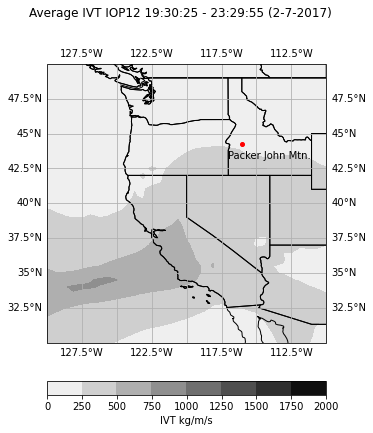

In [280]:
#Integrated Water Vapor Transport (IVT) - Average over SNOWIE IOP12 
fig = plt.figure()
fig.set_size_inches(5,7)
fig.suptitle('Average IVT IOP12 19:30:25 - 23:29:55 (2-7-2017) ' )
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-110,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
Plate = ccrs.PlateCarree()
gridlines = ax.gridlines(draw_labels=True)
IVT_Plot = ax.contourf(IVTLon, IVTLat,IVT_Average, transform=ccrs.PlateCarree(), cmap = plt.cm.binary)
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1, lat -1, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

fig.colorbar(IVT_Plot, orientation="horizontal", pad=0.1, label = 'IVT kg/m/s')
#plt.savefig('IVT_IOP12_Average.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()


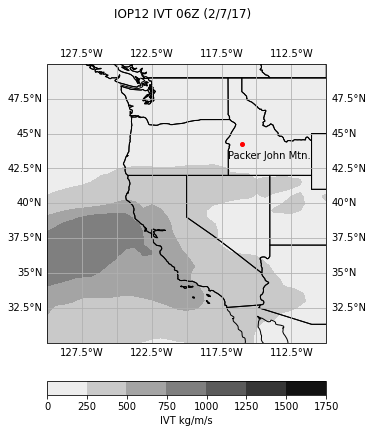

In [97]:
fig = plt.figure()
fig.set_size_inches(5,7)
fig.suptitle('IOP12 IVT 06Z (2/7/17)' )
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.set_extent([-110,-130,30,50], crs=ccrs.PlateCarree())
ax.plot()
Plate = ccrs.PlateCarree()
gridlines = ax.gridlines(draw_labels=True)
IVT_Plot = ax.contourf(IVTLon, IVTLat,IVT_06Z, transform=ccrs.PlateCarree(), cmap = plt.cm.binary)
lat =44.215833
lon = -116.065833
plt.plot(lon,lat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(lon -1, lat -1, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

fig.colorbar(IVT_Plot, orientation="horizontal", pad=0.1, label = 'IVT kg/m/s')


<ipython-input-173-aab3e6eeba7f>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


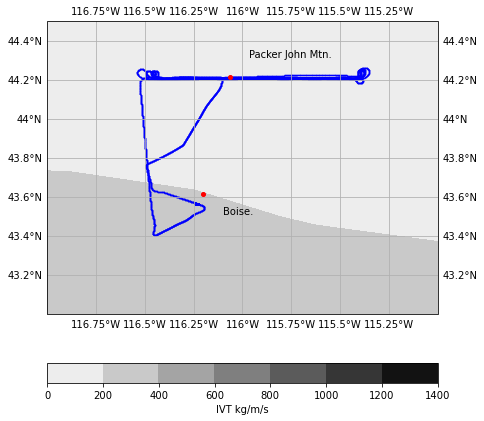

In [173]:
#Plot ARDTs and IVT in close up  
fig = plt.figure()
fig.set_size_inches(7,9)
plt.title('Average Integrated Water Vapor Transport (IVT) - IOP12')
ax =plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)
ax.set_extent([-115,-117,43,44.5], crs=ccrs.PlateCarree()) #narrow to specific study area (LonMin,LonMax,Lat Min,LatMax)
ax.plot()
Plate = ccrs.PlateCarree()
gridlines = ax.gridlines(draw_labels=True)
#Plot Packer John Muntain Coordinates
PJlat =44.215833
PJlon = -116.065833
plt.plot(PJlon,PJlat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(PJlon +0.10, PJlat +0.1, 'Packer John Mtn.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())
#### Plot Boise coordinates 
Blat =43.6150
Blon = -116.2023
plt.plot(Blon,Blat, markersize=4, marker='o', color='red', transform=Plate)
plt.text(Blon +0.10, Blat -0.1, 'Boise.',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())
IVT_Plot = ax.contourf(IVTLon, IVTLat,IVT_Average, transform=ccrs.PlateCarree(), cmap = plt.cm.binary)
fig.colorbar(IVT_Plot, orientation="horizontal", pad=0.1, label = 'IVT kg/m/s')

#Add Flight Track
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.scatter(GLON,GLAT, marker = '.', s=0.5, color='blue', transform=Plate) #GLAT and GLON are the coordinates of flight track
 
plt.show()

#To Do:
#Add inset of Idaho and make plot bigger 
#plot AR and IVT data in close up 

In [ ]:
#Plot Cloud Data

[]

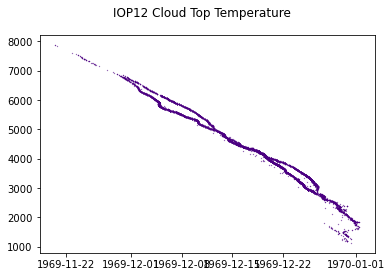

In [174]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Cloud Top Temperature' )

# Plot the date using plot_date rather than plot
ax.plot_date(CloudTempLayer1,CloudTopLayer1, marker ='.', markersize = '0.5', color = 'indigo')

plt.plot()

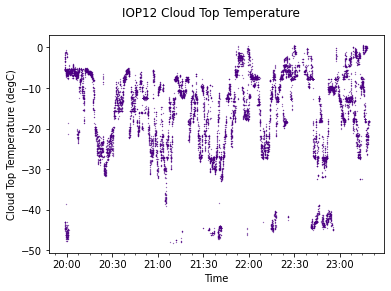

In [86]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Cloud Top Temperature' )

# Plot the date using plot_date rather than plot
ax.plot_date(Cloud_Time, CloudTopTemp, marker ='.', markersize = '0.5', color = 'indigo')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Cloud Top Temperature (degC)')
plt.xlabel('Time')


#plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

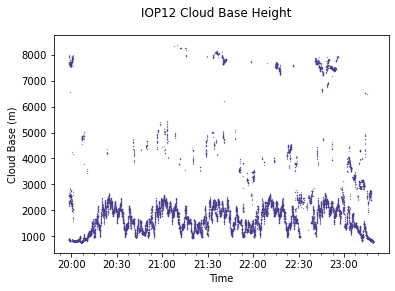

In [28]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Cloud Base Height' )

# Plot the date using plot_date rather than plot
ax.plot_date(Cloud_Time, CloudBase, marker ='.', markersize = '0.5', color = 'darkslateblue')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Cloud Base (m)')
plt.xlabel('Time')

#plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

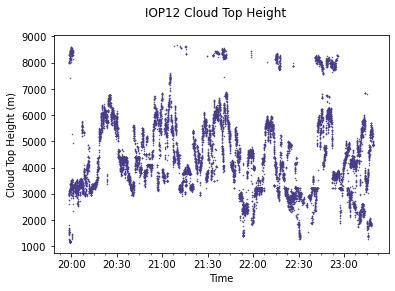

In [27]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Cloud Top Height' )

# Plot the date using plot_date rather than plot
ax.plot_date(Cloud_Time, CloudTop, marker ='.', markersize = '1', color = 'darkslateblue')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Cloud Top Height (m)')
plt.xlabel('Time')

#plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

In [ ]:
# Plot SNOWIE Nevzorov Liquid Water Contenct (LWC), Ice Water Content (IWC), and Total Water Content (TWC)

In [ ]:
#Plot UWKA Aircraft variables

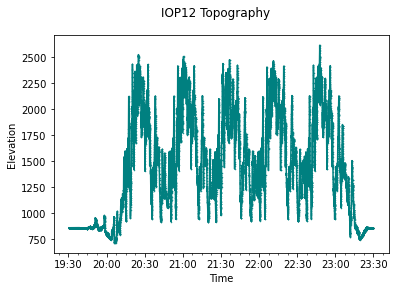

In [91]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Topography' )
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, topo, marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Elevation')
plt.xlabel('Time')

#plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

<function matplotlib.pyplot.show(close=None, block=None)>

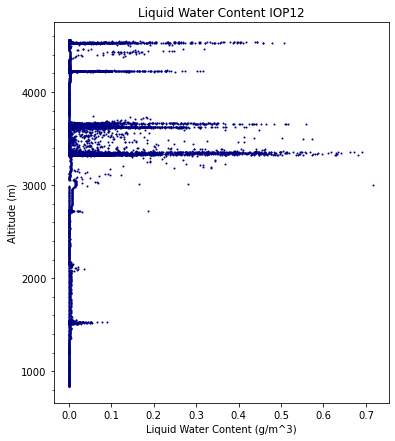

In [91]:
fig, ax = plt.subplots()
plt.title('Liquid Water Content IOP12')
fig.set_size_inches(6,7)

plt.scatter(lwc, GALT, s=1, color ='navy')  
plt.ylabel('Altitude (m)')
plt.xlabel('Liquid Water Content (g/m^3)')

ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

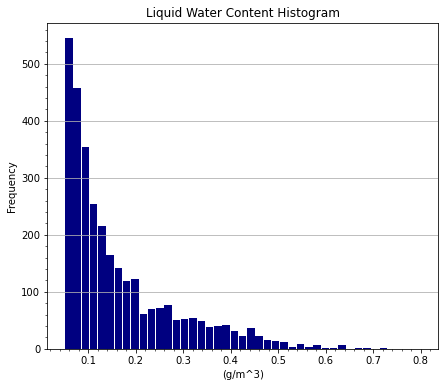

In [222]:
fig, ax =plt.subplots()
fig.set_size_inches(7,6)
plt.title('Liquid Water Content Histogram')
plt.grid(axis='y')

ax.hist(lwc, bins = 'auto', range = (0.05,0.8), rwidth =0.9, color ='navy')
ax.set_xlabel('(g/m^3)')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Frequency')
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('LWCHisto_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

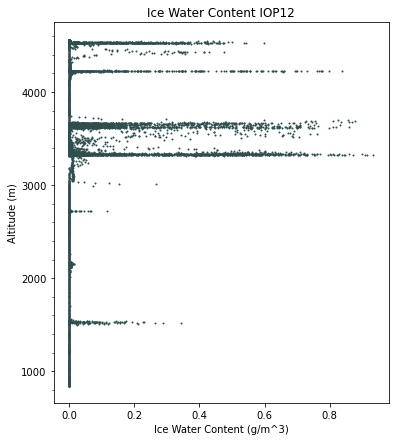

In [93]:
fig, ax = plt.subplots()
plt.title('Ice Water Content IOP12')
fig.set_size_inches(6,7)

plt.scatter(iwc, GALT, s=1, color ='darkslategrey')  
plt.ylabel('Altitude (m)')
plt.xlabel('Ice Water Content (g/m^3)')

ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('IWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

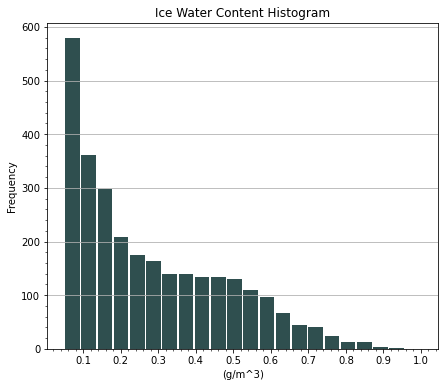

In [217]:
fig, ax =plt.subplots()
fig.set_size_inches(7,6)
plt.title('Ice Water Content Histogram')
plt.grid(axis='y')

ax.hist(iwc, bins = 'auto', range = (0.05,1), rwidth =0.9, color ='darkslategrey')
ax.set_xlabel('(g/m^3)')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Frequency')
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('IWCHisto_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

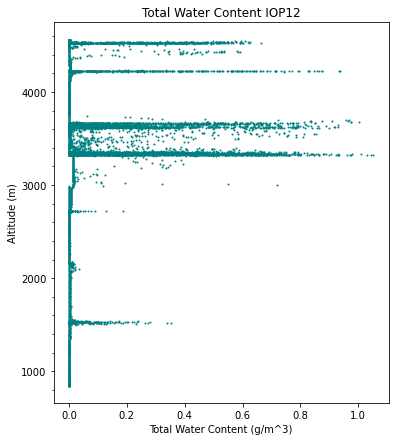

In [95]:
fig, ax = plt.subplots()
plt.title('Total Water Content IOP12')
fig.set_size_inches(6,7)

plt.scatter(twc, GALT, s=1, color ='teal')  
plt.ylabel('Altitude (m)')
plt.xlabel('Total Water Content (g/m^3)')

ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('TWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

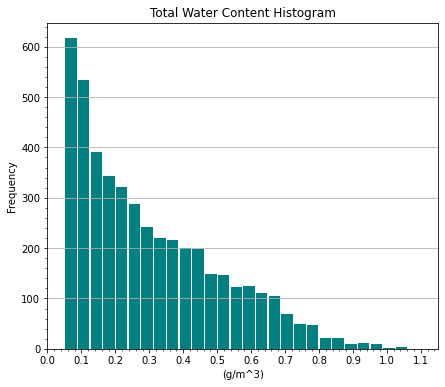

In [229]:
fig, ax =plt.subplots()
fig.set_size_inches(7,6)
plt.title('Total Water Content Histogram')
plt.grid(axis='y')

ax.hist(twc, bins = 'auto', range = (0.05,1.1), rwidth =0.9, color ='teal')
ax.set_xlabel('(g/m^3)')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Frequency')
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('TWCHisto_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

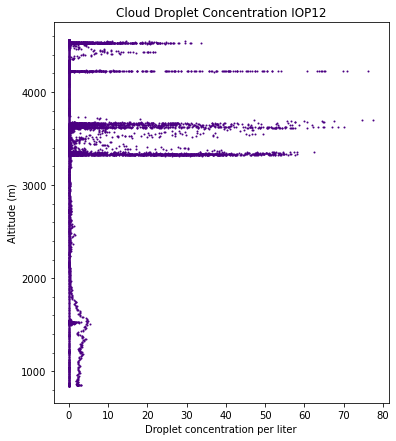

In [98]:
fig, ax = plt.subplots()
plt.title('Cloud Droplet Concentration IOP12')
fig.set_size_inches(6,7)

plt.scatter(twodp, GALT, s=1, color ='indigo')  
plt.ylabel('Altitude (m)')
plt.xlabel('Droplet concentration per liter')

ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show

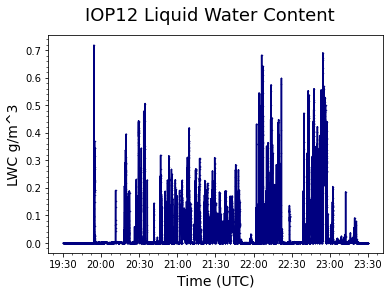

In [67]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Liquid Water Content', fontsize = 18)

# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, lwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_major_locator(MultipleLocator(0.7))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('LWC g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

plt.savefig('LWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()


In [83]:
print(Micro_Time)

[17204.81278935 17204.81280093 17204.8128125  ... 17204.97908565
 17204.97909722 17204.9791088 ]


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\1885091167.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(Micro_Time, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')


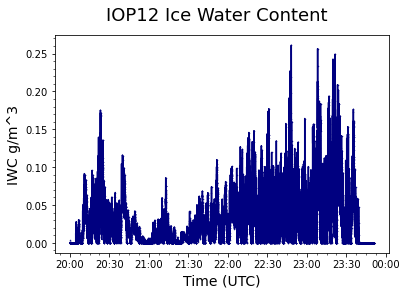

In [42]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Ice Water Content', fontsize = 18)

# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, iwc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('IWC g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

#plt.savefig('IWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')
plt.show()

#set threshold for 0.05
# Ice Water Content (TWC - LWC)

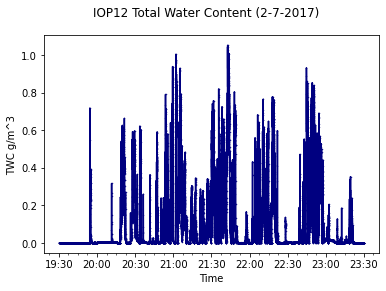

In [281]:
fig, ax = plt.subplots()
fig.suptitle('IOP12 Total Water Content (2-7-2017)' )
# Plot the date using plot_date rather than plot
ax.plot_date(Micro_Time, twc, marker ='.', markersize = '1', linestyle = '-', color = 'navy')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('TWC g/m^3')
plt.xlabel('Time')

#plt.savefig('TWC_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# Total Water Content

In [25]:
Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds
#print(Micro_Time)
#20:21 1486498860
#20:22 1486498920

print((UWKA_Time_Corr)) #17204 is days .xxxxx is the hours minutes and seconds


[17234.82331019 17234.82332176 17234.82333333 ... 17234.99380787
 17234.99381944 17234.99383102]


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\2495543344.py:1: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use mdates.date2num(datetime.utcfromtimestamp(e)) instead.
  Micro_Time = mdates.epoch2num(IOP23time) #puts microphysics time into hours, minutes and seconds


In [ ]:
UWKA_Time_CorrInd = np.where

In [134]:
UWKA_Time_Corr.shape

(14371,)

In [135]:
print(UWKA_Time_Corr[0])

17204.81278935185


In [130]:
a = dt.time(20,21)
print(a)
b= dt.time(20, 22)

20:21:00


In [75]:
Seconds = np.round(np.remainder(UWKA_Time_Corr,1)*24*3600)
StartTime = 22*3600 + 32*60 
StartTimeind = np.where(StartTime==Seconds)
print(StartTimeind[0])
#22:32 = 9986
#22:33 = 10046



[9986]


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\1014269982.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], twodp[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'teal')


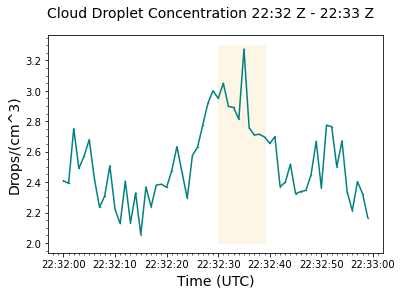

In [70]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration 22:32 Z - 22:33 Z', fontsize = 14)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], twodp[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

x = (UWKA_Time_Corr[10016:10026])
y1 = 2
y2= 3.3
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.savefig('TwoDP IOP23.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\970552129.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], iwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\970552129.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], lwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')


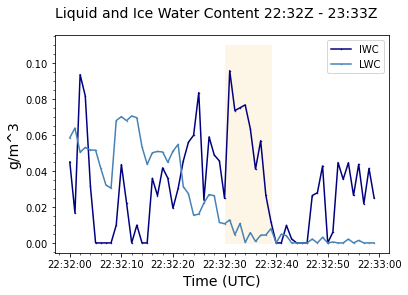

In [76]:
fig, ax = plt.subplots()
fig.suptitle('Liquid and Ice Water Content 22:32Z - 23:33Z', fontsize = 14)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], iwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'navy', label = 'IWC')
ax.plot_date(UWKA_Time_Corr[9986:10046], lwc[9986:10046], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('g/m^3', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

x = (UWKA_Time_Corr[10016:10026])
y1 = 0
y2= 0.11
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.legend (loc='best', )
plt.savefig('IOP23 LWC_IWC.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()


C:\Users\mstell2\AppData\Local\Temp\ipykernel_10940\934755565.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(UWKA_Time_Corr[9986:10046], UWKA_Temp[9076:9136], marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')


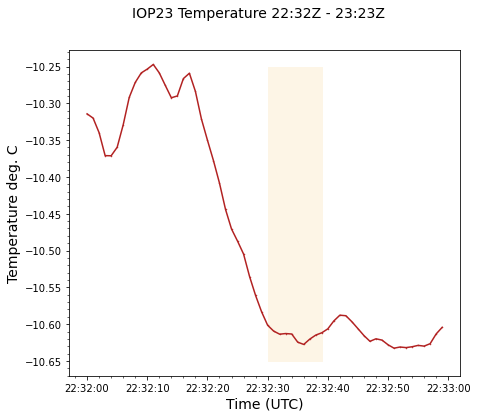

In [82]:
fig, ax = plt.subplots()
fig.suptitle('IOP23 Temperature 22:32Z - 23:23Z', fontsize = 14)
fig.set_size_inches(7,6)

# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr[9986:10046], UWKA_Temp[9076:9136], marker ='.', markersize = '1', linestyle = '-', color = 'firebrick')
#ax.plot_date(UWKA_Time_Corr[2435:2495], lwc[2435:2495], marker ='.', markersize = '1', linestyle = '-', color = 'steelblue', label = 'LWC')

# Choose your xtick format string
date_fmt = '%H:%M:%S'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

#ax.set_xlim(a,b)
plt.ylabel('Temperature deg. C', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)


x = (UWKA_Time_Corr[10016:10026])
y1 = -10.65
y2= -10.25
ax.fill_between(x,y1,y2, color = 'oldlace')

plt.savefig('IOP23 Temperature.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='horizontal')
plt.show()


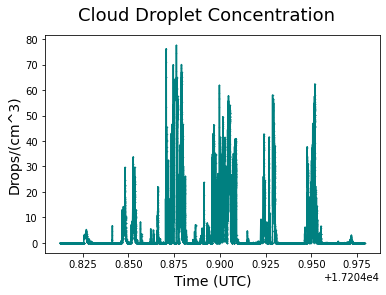

In [107]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration', fontsize = 18)
# Plot the date using plot_date rather than plot
ax.plot(UWKA_Time_Corr, twodp, marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
#date_formatterMajor = mdates.DateFormatter(date_fmt)
#ax.xaxis.set_major_formatter(date_formatterMajor)
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

#plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

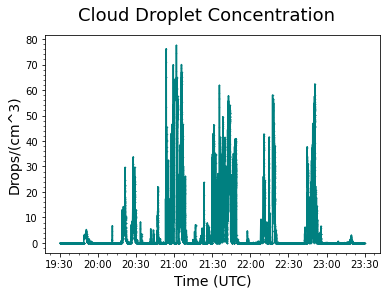

In [106]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration', fontsize = 18)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, twodp, marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

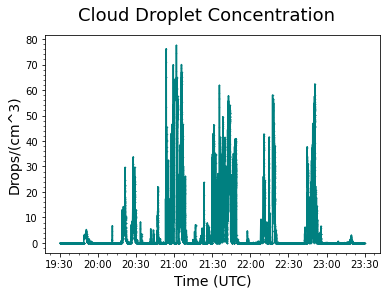

In [106]:
fig, ax = plt.subplots()
fig.suptitle('Cloud Droplet Concentration', fontsize = 18)
# Plot the date using plot_date rather than plot
ax.plot_date(UWKA_Time_Corr, twodp, marker ='.', markersize = '1', linestyle = '-', color = 'teal')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(date_formatterMajor)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Drops/(cm^3)', fontsize = 14)
plt.xlabel('Time (UTC)', fontsize = 14)

plt.savefig('TwoDP_IOP12.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait')

plt.show()
# TwoDP Concentration 

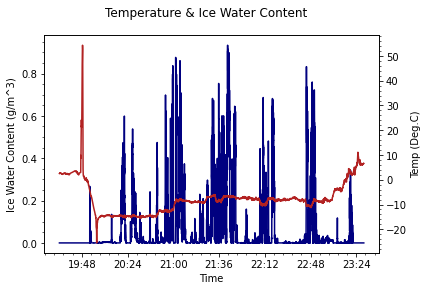

<Figure size 432x288 with 0 Axes>

In [98]:
# Plot of Altitude and Ice Water Content
Time = UWKA_Time_Corr
data1 = UWKA_Temp
data2 = iwc

fig, ax1 = plt.subplots()
fig.suptitle('Temperature & Ice Water Content' )

color = 'navy'
ax1.set_xlabel('Time')
ax1.set_ylabel('Ice Water Content (g/m^3)', color='black')
ax1.plot(Time, data2, color=color)
ax1.tick_params(axis='y', labelcolor='black')
# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax1.xaxis.set_major_formatter(date_formatterMajor)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'firebrick'
ax2.set_ylabel('Temp (Deg.C)', color='black')  
ax2.plot(Time, data1, color=color)
ax2.tick_params(axis='y', labelcolor='black')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax2.xaxis.set_major_formatter(date_formatterMajor)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('Alt vs. IWC.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait', format = 'JPG')
plt.show()
plt.clf()


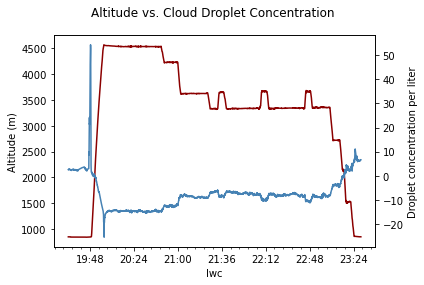

<Figure size 432x288 with 0 Axes>

In [103]:
# Plot of Altitude and Cloud Droplet Concentration
Time = UWKA_Time_Corr
data1 = GALT
data2 = UWKA_Temp

fig, ax1 = plt.subplots()
fig.suptitle('Altitude vs. Cloud Droplet Concentration' )

color = 'darkred'
ax1.set_xlabel('lwc')
ax1.set_ylabel('Altitude (m)', color='black')
ax1.plot(Time, data1, color=color)
ax1.tick_params(axis='y', labelcolor='black')
# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax1.xaxis.set_major_formatter(date_formatterMajor)
ax1.xaxis.set_minor_locator(AutoMinorLocator())


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'steelblue'
ax2.set_ylabel('Droplet concentration per liter', color='black')  
ax2.plot(Time, data2, color=color)
ax2.tick_params(axis='y', labelcolor='black')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax2.xaxis.set_major_formatter(date_formatterMajor)
ax2.xaxis.set_minor_locator(AutoMinorLocator())

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('Alt vs. Twodp.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait', format = 'JPG')
plt.show()
plt.clf()

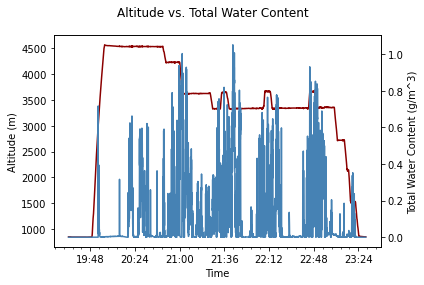

<Figure size 432x288 with 0 Axes>

In [79]:
# Plot of Altitude and Total Water Content
Time = UWKA_Time_Corr
data1 = GALT
data2 = twc

fig, ax1 = plt.subplots()
fig.suptitle('Altitude vs. Total Water Content' )

color = 'darkred'
ax1.set_xlabel('Time')
ax1.set_ylabel('Altitude (m)', color='black')
ax1.plot(Time, data1, color=color)
ax1.tick_params(axis='y', labelcolor='black')
# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax1.xaxis.set_major_formatter(date_formatterMajor)
ax1.xaxis.set_minor_locator(AutoMinorLocator())


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'steelblue'
ax2.set_ylabel('Total Water Content (g/m^3)', color='black')  
ax2.plot(Time, data2, color=color)
ax2.tick_params(axis='y', labelcolor='black')

# Choose your xtick format string
date_fmt = '%H:%M'

# Use a DateFormatter to set the data to the correct format.
date_formatterMajor = mdates.DateFormatter(date_fmt)
ax2.xaxis.set_major_formatter(date_formatterMajor)
ax2.xaxis.set_minor_locator(AutoMinorLocator())

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('Alt vs. TWC.jpg', dpi=300, facecolor='w', edgecolor='w',orientation='portrait', format = 'JPG')
plt.show()
plt.clf()

In [ ]:
#RutzTime =ARTMIP_Rutz.variables['time'][:] #RutzLat =ARTMIP_Rutz.variables['lat'][:] 
#RutzLon =ARTMIP_Rutz.variables['lon'][:]
#AR = ARTMIP_Rutz.variables['ar_binary_tag'][:]
#RutzAR =np.sum(ARTMIP_Rutz.variables['ar_binary_tag'],(1,2)) 

In [ ]:
#Plot flight track 

TypeError: multiple values for argument 's'

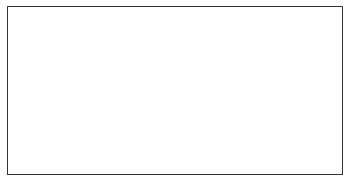

In [162]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.scatter(GALT,GLON, GLAT, s=0.5)

gridlines = ax.gridlines(draw_labels=True)
plt.show()

In [ ]:
#Create a loop to determine: For each flight is there an AR present? Was there an AR (n) hours before?

In [ ]:
#Define variables for loop

In [31]:
atmR =np.zeros(14371) #creating an empty array of size 14371 - size of time in UWKA_Time , to determine if an AR is present, define IOP time
#ind=np.where(rt==3272400)  #out of 960 time values, IOP12 corresponds to the 303 time value
ModelRiver = ARTime[ind,:,:].reshape((361,576))
ModelLat = np.asarray(RutzLat)
ModelLon = np.asarray(RutzLon)  #transforms the list RutzLon into an array 

In [209]:
statistics.median(IOP12Time_Corr)  #Time in seconds of the middle of the IOP12 flight

3274210.0

In [42]:
for t in range (1):   #14371):
    #IOPtime = [UWKA_Time]  #IOP12 time variable corrected 
   # ModelTime = [rt]
    #TimeDiff =IOPtime[]- ModelTime      #3274210.0 seconds = middle of flight : minimum of absolute value is closest point in time possibly add timezone shift in parens
    #TimeIndex =np.argmin(TimeDiff)           #Identifying index value of model time that corresponds to flight time 
    DistDiff =np.sqrt(( ModelLat - GLAT[t].flatten)**2 + (ModelLon -np.cos(np.pi/180*GLAT[t].flatten)*GLON[t].flatten)**2) #scaling longitude for curvature of earth based on lat
    
    DistIndex = np.argmin(DistDiff)    #Should return index, does argmin of a 2D array return 2 indices?  Does array get flattened into one value? 
    LatIndex = DistIndex[0] #Index number TBD ????
    LonIndex = DistIndex[1] #Index number TBD  ?????
    atmR[t]=ModelRiver[LonIndex, LatIndex]   #AR river at time t = model output at same time and location #LatIndex and LonIndex come from DistIndex

    #should output atmR which is the 1 or 0 that corresponds to time and location of the aircraft 

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

In [40]:
GLAT[1].shape

()

In [36]:
type(ModelLat)

numpy.ndarray

In [ ]:
#Index 303 = flight time, 302 = 3 hours before, 301 = 6 hours before, 300 = 9 hours before ect. 

In [ ]:
#To Do:
#Make a plot for each time of AR in different colors
#Make a gif for the series of AR movement 